<a href="https://colab.research.google.com/github/Vinit3106/Project_1/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Libraries

In [ ]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.0 MB/s eta 0:00:00


In [ ]:
# @title Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import mplfinance as mpf
import folium
from folium.plugins import MarkerCluster

In [ ]:
df = pd.read_csv('CBB_Listings_LongLat (2).csv')

In [ ]:
!pip install dtale



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.7/219.7 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 91.4 MB/s eta 0:00:00
  Created wheel for dash-colorscales: filename=dash_colorscales-0.0.4-py3-none-any.whl size=62568 sha256=e02693aa5ae8d50563a675b41

In [ ]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html("sweetviz_report.html")

ModuleNotFoundError: No module named 'sweetviz'

In [ ]:
# prompt: use describe to provide us the count mean value
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145114 entries, 0 to 145113
Data columns (total 49 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   listing_id               145114 non-null  object 
 1   listing_heading          141099 non-null  object 
 2   listing_type             145114 non-null  object 
 3   listing_url              145114 non-null  object 
 4   listing_first_date       145114 non-null  object 
 5   days_on_market           145114 non-null  int64  
 6   dealer_id                145114 non-null  int64  
 7   dealer_name              145114 non-null  object 
 8   dealer_street            145114 non-null  object 
 9   dealer_city              145114 non-null  object 
 10  dealer_province          145114 non-null  object 
 11  dealer_postal_code       145114 non-null  object 
 12  Latitude                 145114 non-null  float64
 13  Longitude                145114 non-null  float64
 14  Lat 

In [ ]:
df.dtypes

,0
listing_id,object
listing_heading,object
listing_type,object
listing_url,object
listing_first_date,object
days_on_market,int64
dealer_id,int64
dealer_name,object
dealer_street,object
dealer_city,object


In [ ]:
#  the average price for used and new cars in dollars

average_price = df.groupby('stock_type')['price'].mean().apply(lambda x: f"${x:,.2f}")
print(average_price)


stock_type
NEW     $63,024.30
USED    $34,446.44
Name: price, dtype: object


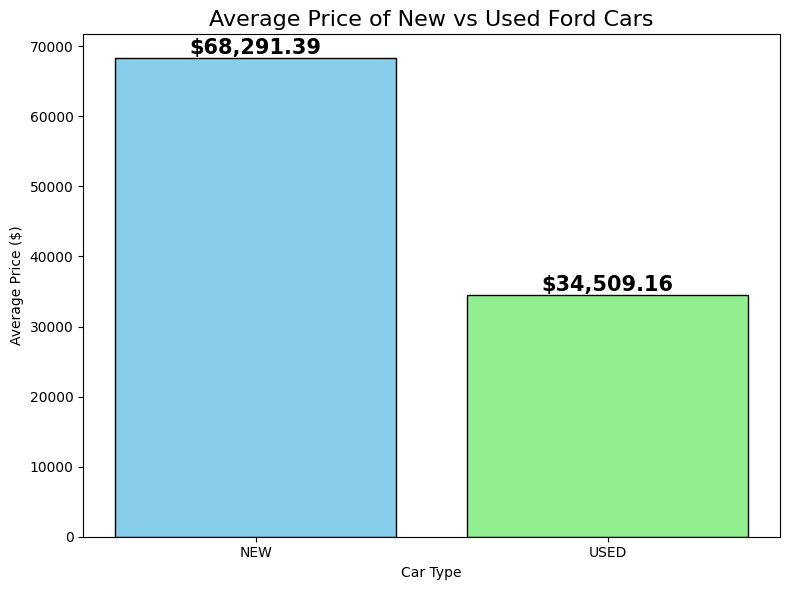

In [ ]:
# Filtrar o DataFrame para incluir apenas carros da Ford
ford_df = df[df['make'] == 'Ford']

# Criar gráfico de barras com preço médio para carros Ford (Novos vs Usados)
plt.figure(figsize=(8, 6))

# Calcular o preço médio para carros Ford, agrupados por 'stock_type'
average_price_values_ford = ford_df.groupby('stock_type')['price'].mean()

# Criar o gráfico de barras
plt.bar(average_price_values_ford.index, average_price_values_ford.values, color=['skyblue', 'lightgreen'], edgecolor='black')

# Adicionar os valores em dólar no topo de cada barra
for index, value in enumerate(average_price_values_ford.values):
    plt.text(index, value, f'${value:,.2f}', ha='center', va='bottom', fontsize=15, fontweight='bold')

# Configurações do gráfico
plt.title('Average Price of New vs Used Ford Cars', fontsize=16)
plt.xlabel('Car Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=0)
plt.tight_layout()

# Mostrar o gráfico
plt.show()


In [ ]:
import pandas as pd

# Identificar as top 5 marcas com base no número de vendas
top_5_makes = df['make'].value_counts().head(5).index

# Filtrar o DataFrame para incluir apenas as top 5 marcas
top_5_df = df[df['make'].isin(top_5_makes)]

# Agrupar por 'make' e 'stock_type' e calcular o preço médio
average_price_top_5 = top_5_df.groupby(['make', 'stock_type'])['price'].mean().unstack()

# Adicionar formatação para dólar usando map em vez de applymap
average_price_top_5_formatted = average_price_top_5.map(lambda x: f"${x:,.2f}")

# Exibir a tabela no ambiente de Jupyter (ou usar print() para exibir no terminal)
from IPython.display import display
display(average_price_top_5_formatted)

# Se estiver em um terminal, você pode usar print():
# print(average_price_top_5_formatted)


stock_type,NEW,USED
make,,
Chevrolet,"$75,924.64","$38,248.02"
Ford,"$68,291.39","$34,509.16"
GMC,"$86,647.84","$47,857.87"
Nissan,"$41,868.91","$23,970.60"
Ram,"$71,826.70","$42,606.94"


In [ ]:
import pandas as pd

# Load the dataset (replace 'your_file.csv' with the correct path to the CSV file)
df = pd.read_csv('CBB_Listings_LongLat (2).csv')

# Group by dealer_name and calculate the number of cars sold and total sales amount
dealership_sales = df.groupby('dealer_name').agg(
    total_cars_sold=('price', 'count'),    # Total number of cars sold
    total_sales_amount=('price', 'sum')    # Total sales amount
).reset_index()

# Sort by total sales amount and total cars sold in descending order
dealership_sales_sorted = dealership_sales.sort_values(by=['total_cars_sold', 'total_sales_amount'], ascending=False).head(11)

# Display the top 10 dealerships
dealership_sales_sorted


,dealer_name,total_cars_sold,total_sales_amount
17,Autocanada,25442,1103827973
16,AutoCanada,17743,881643045
26,Canada One Auto Group,17364,922221492
55,Drive Electric Autos,3506,231888421
106,Kaizen Kustoms,3335,163918557
114,L.A. Mazda,3210,166995646
116,Lakewood Chevrolet,2801,171137757
144,Northgate Chevrolet Buick Gmc,2796,196382163
175,Sherwood Park Chevrolet,2109,119149480
94,House Of Cars Leduc,1841,57453769


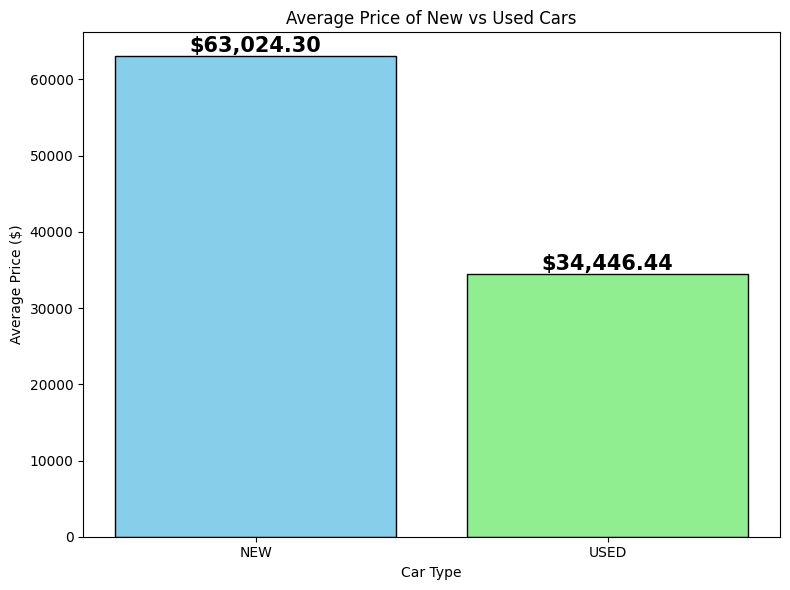

In [ ]:
# @title Average Price - NEW vs USED cars
# Creating a bar graph with dollar values displayed on top of each bar
plt.figure(figsize=(8, 6))
average_price_values = df.groupby('stock_type')['price'].mean()
plt.bar(average_price_values.index, average_price_values.values, color=['skyblue', 'lightgreen'], edgecolor='black')

# Adding the dollar values on top of each bar
for index, value in enumerate(average_price_values.values):
    plt.text(index, value, f'${value:,.2f}', ha='center', va='bottom', fontsize=15, fontweight='bold')

plt.title('Average Price of New vs Used Cars')
plt.xlabel('Car Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<ipython-input-12-e7bc1bdded2c>:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'${np.expm1(tick):,.0f}' for tick in yticks])  # Transform to original price values


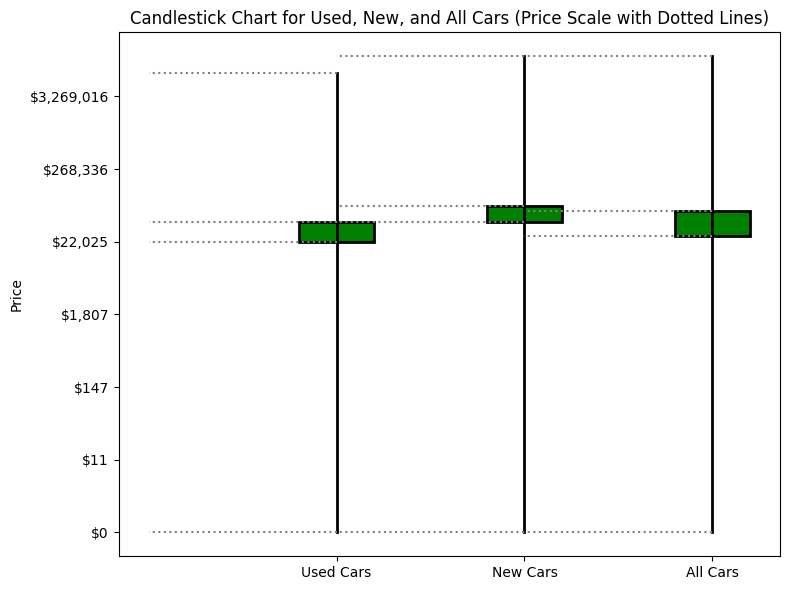

In [ ]:
# @title Candlestick Chart for New and Used Cars

# Filter the data into Used Cars, New Cars, and All Cars
df_used = df[df['stock_type'] == 'USED']
df_new = df[df['stock_type'] == 'NEW']
df_all = df  # All cars

# Function to calculate the candlestick values (High, Low, Open, Close) using log-transformed prices
def calculate_candlestick_metrics(data):
    log_prices = np.log1p(data['price'])  # Log-transform prices using log1p (handles zero prices)
    high = log_prices.max()
    low = log_prices.min()
    open_ = log_prices.quantile(0.25)  # 25th percentile
    close = log_prices.quantile(0.75)  # 75th percentile
    return high, low, open_, close

# Calculate the candlestick metrics for each group
high_used, low_used, open_used, close_used = calculate_candlestick_metrics(df_used)
high_new, low_new, open_new, close_new = calculate_candlestick_metrics(df_new)
high_all, low_all, open_all, close_all = calculate_candlestick_metrics(df_all)

# Create a DataFrame for easier plotting
candlestick_data = pd.DataFrame({
    'Type': ['Used Cars', 'New Cars', 'All Cars'],
    'High': [high_used, high_new, high_all],
    'Low': [low_used, low_new, low_all],
    'Open': [open_used, open_new, open_all],
    'Close': [close_used, close_new, close_all]
})

# Plot the candlestick chart
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each candlestick
for idx, row in candlestick_data.iterrows():
    # Determine color (green for bullish, red for bearish)
    color = 'green' if row['Close'] >= row['Open'] else 'red'

    # Plot the line from Low to High
    ax.plot([idx, idx], [row['Low'], row['High']], color='black', lw=2)

    # Plot the box from Open to Close (candlestick body)
    ax.add_patch(plt.Rectangle((idx - 0.2, row['Open']), 0.4, row['Close'] - row['Open'],
                               facecolor=color, edgecolor='black', lw=2))

    # Add dotted lines from OPEN, CLOSE, HIGH, and LOW to the y-axis
    ax.plot([idx, idx - 1], [row['Open'], row['Open']], linestyle='dotted', color='gray')
    ax.plot([idx, idx - 1], [row['Close'], row['Close']], linestyle='dotted', color='gray')
    ax.plot([idx, idx - 1], [row['High'], row['High']], linestyle='dotted', color='gray')
    ax.plot([idx, idx - 1], [row['Low'], row['Low']], linestyle='dotted', color='gray')

# Set the x-ticks and labels
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Used Cars', 'New Cars', 'All Cars'])

# Set the y-axis back to price values (reverse the log transformation for display)
yticks = ax.get_yticks()  # Get the current y-axis ticks (which are in log scale)
ax.set_yticklabels([f'${np.expm1(tick):,.0f}' for tick in yticks])  # Transform to original price values

ax.set_ylabel('Price')
ax.set_title('Candlestick Chart for Used, New, and All Cars (Price Scale with Dotted Lines)')

# Show the plot
plt.tight_layout()
plt.show()

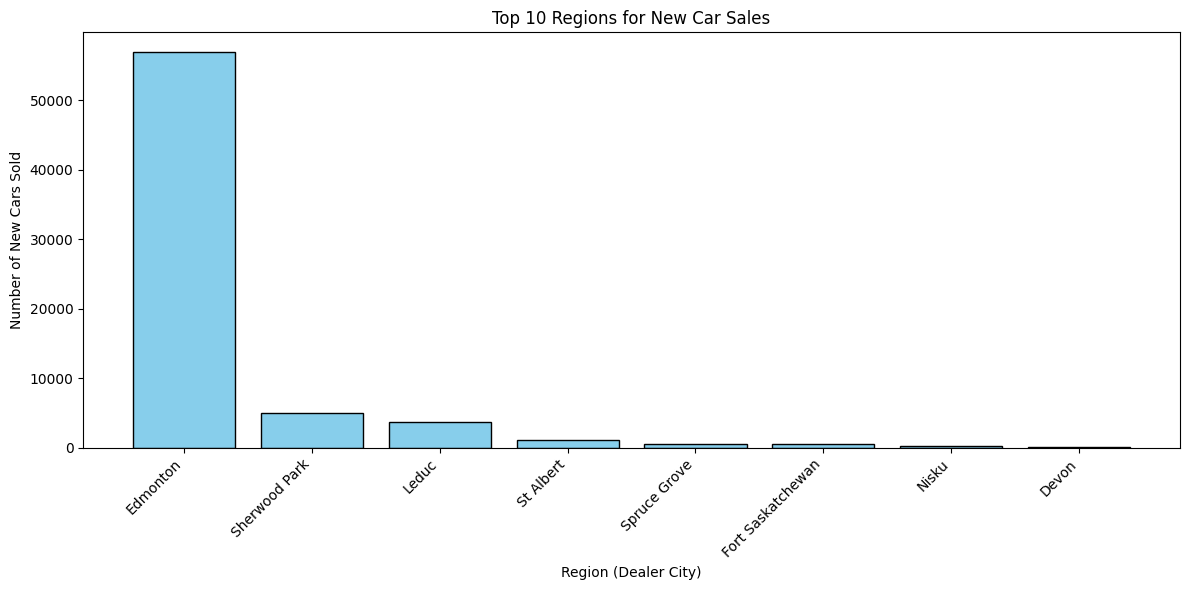

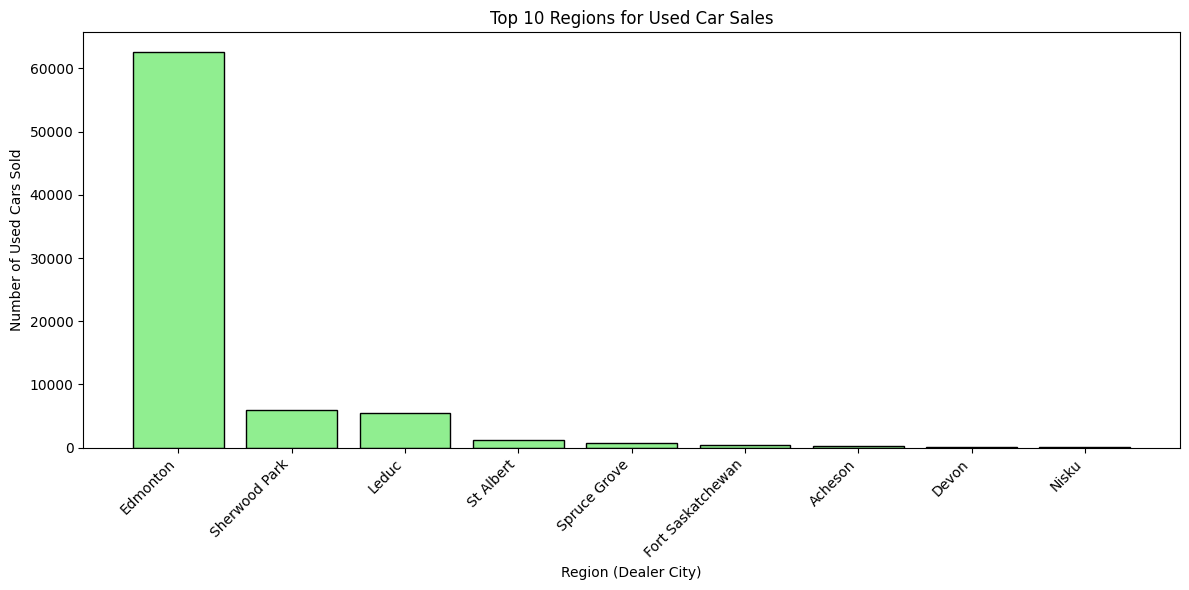

In [ ]:
# @title Top #10 Regions


# Extracting data for new and used cars separately
new_cars = df[df['stock_type'] == 'NEW']
used_cars = df[df['stock_type'] == 'USED']

# Counting the number of sales in each region (assuming 'dealer_city' represents the region)
new_cars_region_sales = new_cars['dealer_city'].value_counts().nlargest(10)
used_cars_region_sales = used_cars['dealer_city'].value_counts().nlargest(10)

# Plotting the graph for New Cars
plt.figure(figsize=(12, 6))
plt.bar(new_cars_region_sales.index, new_cars_region_sales.values, color='skyblue', edgecolor='black')
plt.title('Top 10 Regions for New Car Sales')
plt.xlabel('Region (Dealer City)')
plt.ylabel('Number of New Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting the graph for Used Cars
plt.figure(figsize=(12, 6))
plt.bar(used_cars_region_sales.index, used_cars_region_sales.values, color='lightgreen', edgecolor='black')
plt.title('Top 10 Regions for Used Car Sales')
plt.xlabel('Region (Dealer City)')
plt.ylabel('Number of Used Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

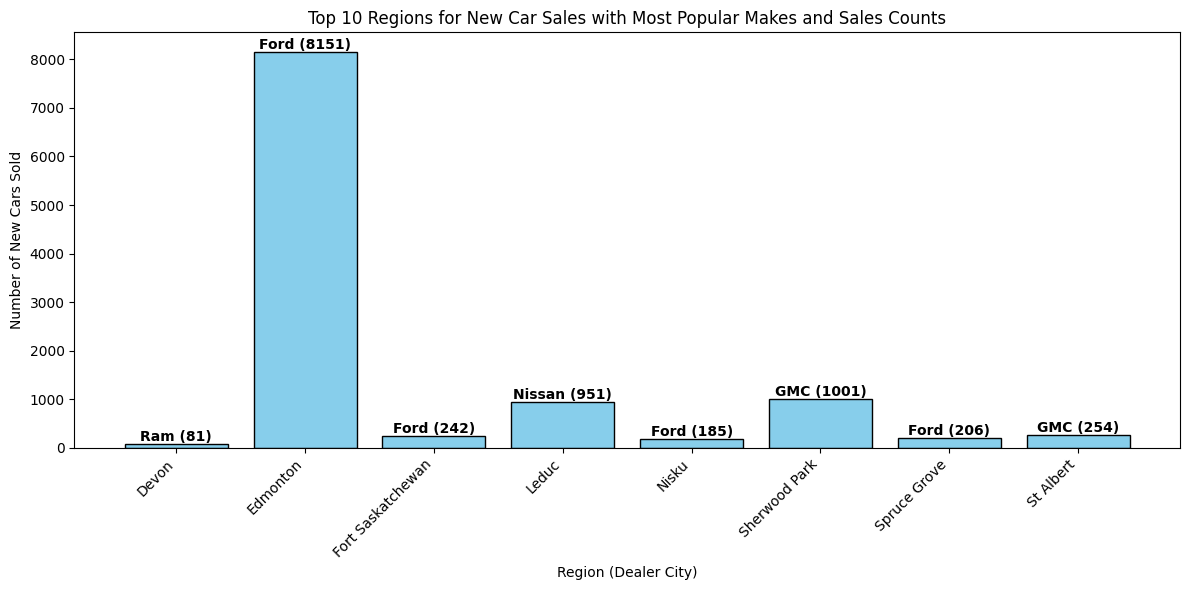

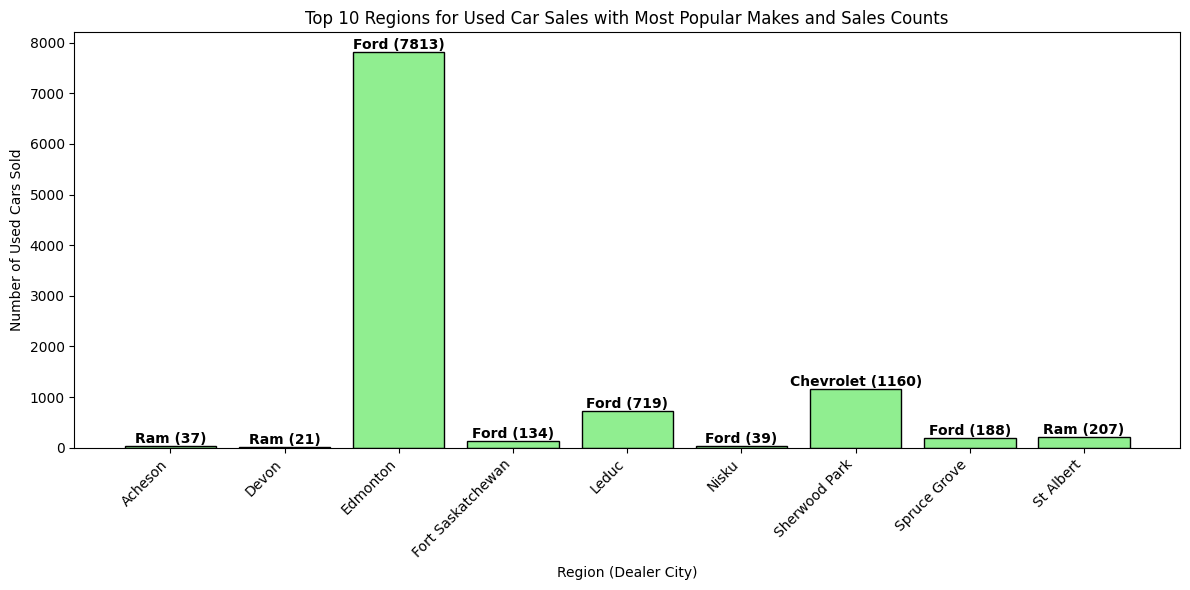

In [ ]:
# @title Top 10 Regions for New Car Sales with Most Popular Makes and Sales Counts
# Extracting the top 10 regions for new and used car sales along with the most popular car make in each region

# For New Cars
#new_cars = df[df['stock_type'] == 'NEW']
new_cars_region_sales_make = new_cars.groupby(['dealer_city', 'make']).size().reset_index(name='counts')
new_cars_region_sales_make = new_cars_region_sales_make.sort_values(['dealer_city', 'counts'], ascending=[True, False])
top_new_cars_region = new_cars['dealer_city'].value_counts().nlargest(10).index
new_cars_region_sales_make_top = new_cars_region_sales_make[new_cars_region_sales_make['dealer_city'].isin(top_new_cars_region)]

# For Used Cars
#used_cars = df[df['stock_type'] == 'USED']
used_cars_region_sales_make = used_cars.groupby(['dealer_city', 'make']).size().reset_index(name='counts')
used_cars_region_sales_make = used_cars_region_sales_make.sort_values(['dealer_city', 'counts'], ascending=[True, False])
top_used_cars_region = used_cars['dealer_city'].value_counts().nlargest(10).index
used_cars_region_sales_make_top = used_cars_region_sales_make[used_cars_region_sales_make['dealer_city'].isin(top_used_cars_region)]

# Getting the most popular make for each top region
new_cars_region_top_makes = new_cars_region_sales_make_top.groupby('dealer_city').first().reset_index()
used_cars_region_top_makes = used_cars_region_sales_make_top.groupby('dealer_city').first().reset_index()

# Plotting the graph for New Cars with makes and sales values included
plt.figure(figsize=(12, 6))
plt.bar(new_cars_region_top_makes['dealer_city'], new_cars_region_top_makes['counts'], color='skyblue', edgecolor='black')
for i in range(len(new_cars_region_top_makes)):
    plt.text(i, new_cars_region_top_makes['counts'].iloc[i],
             f"{new_cars_region_top_makes['make'].iloc[i]} ({new_cars_region_top_makes['counts'].iloc[i]})",
             ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title('Top 10 Regions for New Car Sales with Most Popular Makes and Sales Counts')
plt.xlabel('Region (Dealer City)')
plt.ylabel('Number of New Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# Plotting the graph for Used Cars with makes and sales values included
plt.figure(figsize=(12, 6))
plt.bar(used_cars_region_top_makes['dealer_city'], used_cars_region_top_makes['counts'], color='lightgreen', edgecolor='black')
for i in range(len(used_cars_region_top_makes)):
    plt.text(i, used_cars_region_top_makes['counts'].iloc[i],
             f"{used_cars_region_top_makes['make'].iloc[i]} ({used_cars_region_top_makes['counts'].iloc[i]})",
             ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title('Top 10 Regions for Used Car Sales with Most Popular Makes and Sales Counts')
plt.xlabel('Region (Dealer City)')
plt.ylabel('Number of Used Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

######**Filtering the dataset to focus on Edmonton region only**

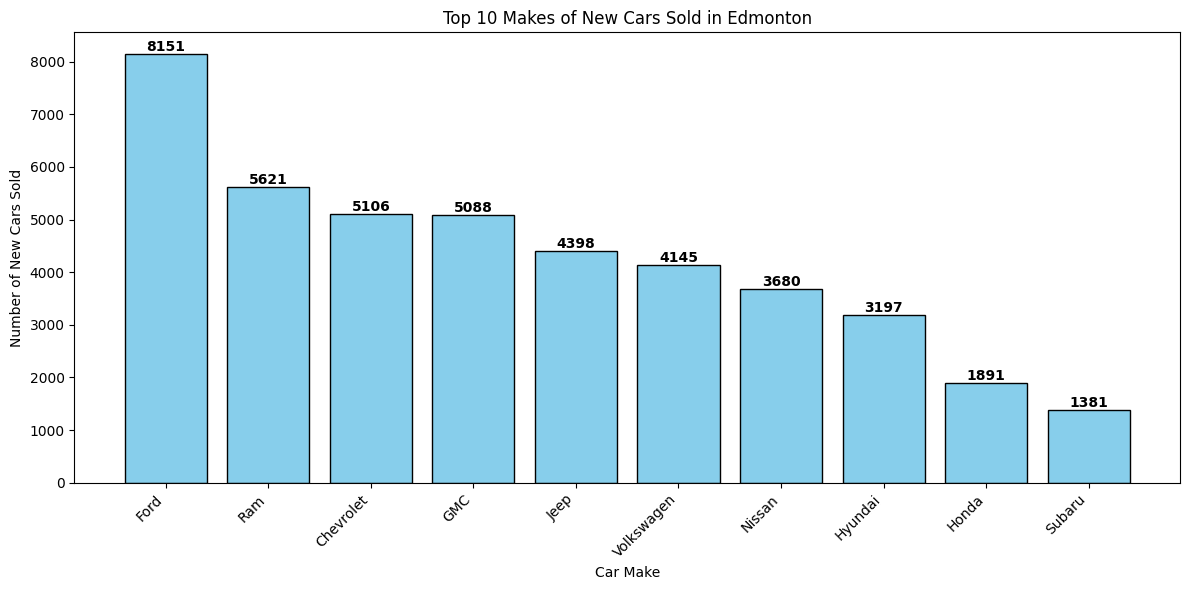

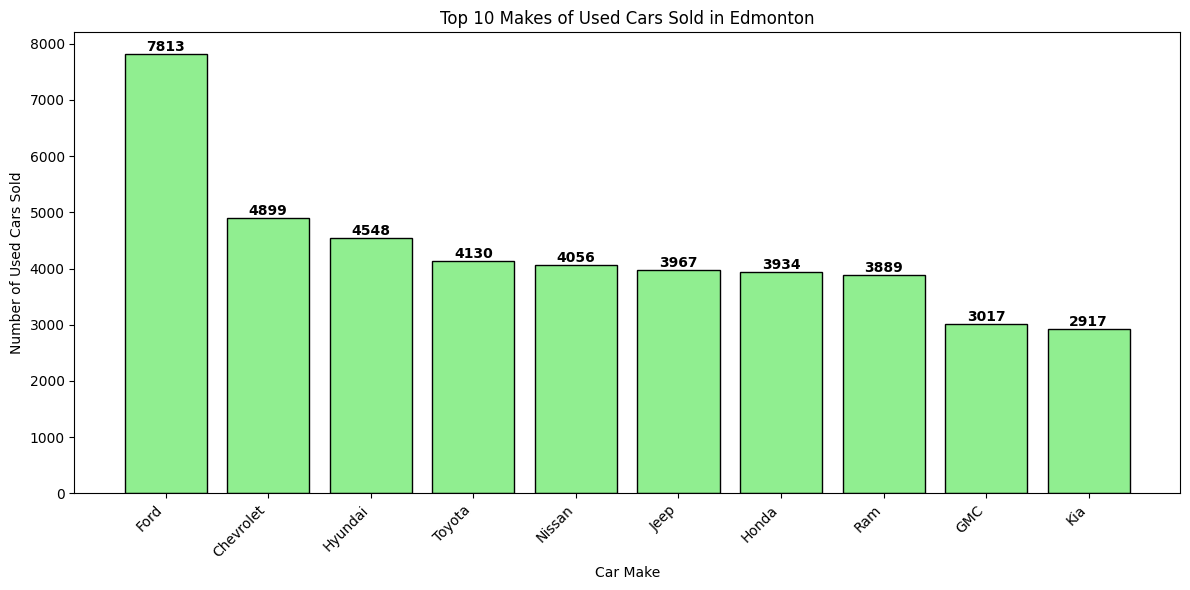

In [ ]:
# @title Top 10 Makes of Used Cars Sold in Edmonton

# Filtering the dataset to focus on Edmonton region only
df_edmonton = df[df['dealer_city'] == 'Edmonton']

# Separating the Edmonton data into new and used cars
new_cars_edmonton = df_edmonton[df_edmonton['stock_type'] == 'NEW']
used_cars_edmonton = df_edmonton[df_edmonton['stock_type'] == 'USED']

# Counting the number of sales for each make in Edmonton for new cars
new_cars_edmonton_sales = new_cars_edmonton['make'].value_counts().nlargest(10)

# Counting the number of sales for each make in Edmonton for used cars
used_cars_edmonton_sales = used_cars_edmonton['make'].value_counts().nlargest(10)

# Plotting the graph for New Cars in Edmonton with sales numbers included
plt.figure(figsize=(12, 6))
plt.bar(new_cars_edmonton_sales.index, new_cars_edmonton_sales.values, color='skyblue', edgecolor='black')
for i in range(len(new_cars_edmonton_sales)):
    plt.text(i, new_cars_edmonton_sales.values[i], str(new_cars_edmonton_sales.values[i]), ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title('Top 10 Makes of New Cars Sold in Edmonton')
plt.xlabel('Car Make')
plt.ylabel('Number of New Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting the graph for Used Cars in Edmonton with sales numbers included
plt.figure(figsize=(12, 6))
plt.bar(used_cars_edmonton_sales.index, used_cars_edmonton_sales.values, color='lightgreen', edgecolor='black')
for i in range(len(used_cars_edmonton_sales)):
    plt.text(i, used_cars_edmonton_sales.values[i], str(used_cars_edmonton_sales.values[i]), ha='center', va='bottom', fontsize=10, fontweight='bold')
plt.title('Top 10 Makes of Used Cars Sold in Edmonton')
plt.xlabel('Car Make')
plt.ylabel('Number of Used Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-78-bc4ae97c0691>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mileage['log_mileage'] = np.log1p(df_mileage['mileage'])
<ipython-input-78-bc4ae97c0691>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([f'{int(np.expm1(i)):,}' for i in ticks])  # `:,` adds commas for readability
<ipython-input-78-bc4ae97c0691>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([f'{int(np.expm1(i)):,}' for i in ticks])
<ipython-input-78-bc4ae97c0691>:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([int(np.expm1(i)) for i in ticks])


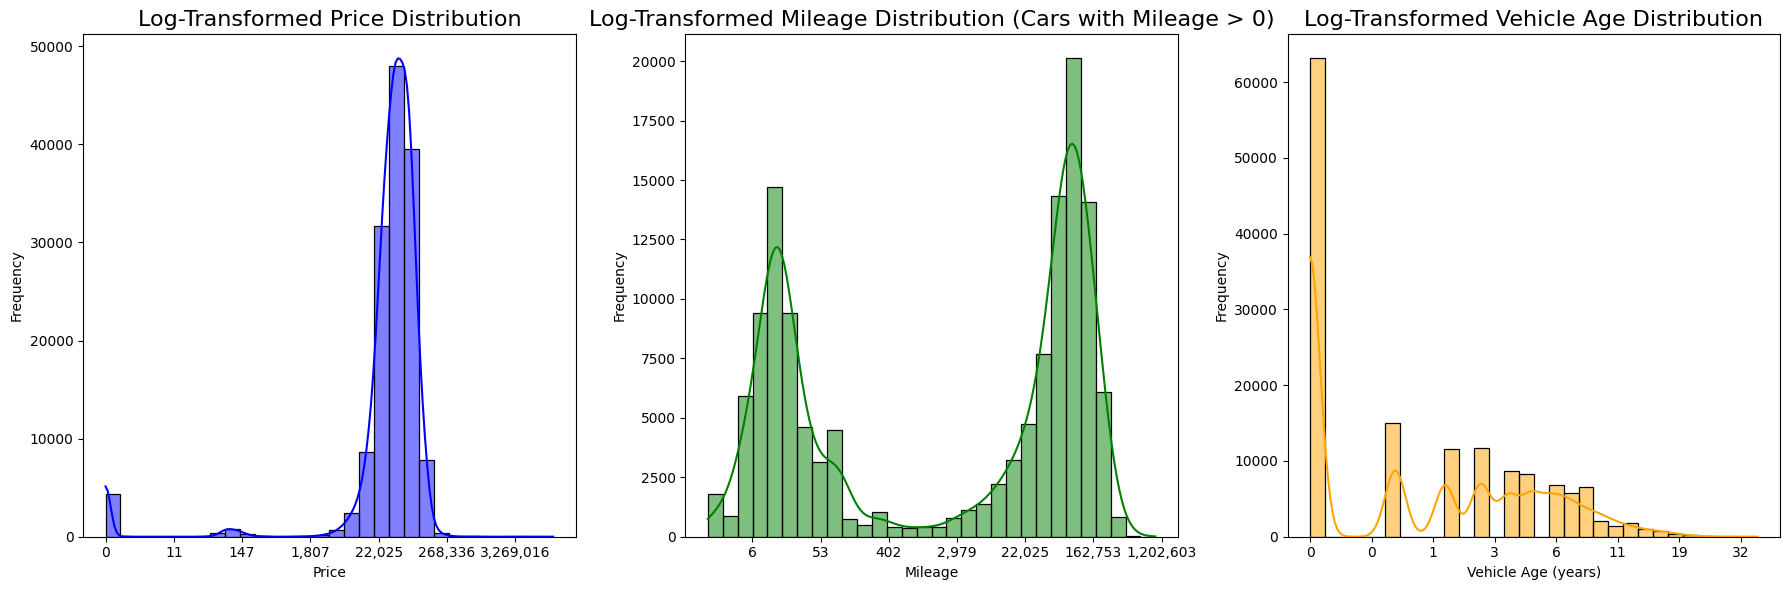

In [ ]:
# @title Log-Transformed Vehicle Age Distribution

# Load the dataset
# df = pd.read_csv('your_data_file.csv')

# Assuming the columns in your dataset are 'price', 'mileage', and 'model_year'
# Assuming current year is 2024 for vehicle age calculation
current_year = 2024
df['vehicle_age'] = current_year - df['model_year']

# Apply log transformation to price and vehicle_age
df['log_price'] = np.log1p(df['price'])  # log1p is used to handle zero values if present
df['log_vehicle_age'] = np.log1p(df['vehicle_age'])

# Filter only cars with mileage greater than 0 for the mileage plot
df_mileage = df[df['mileage'] > 0]
df_mileage['log_mileage'] = np.log1p(df_mileage['mileage'])

# Plot histograms for the log-transformed data
plt.figure(figsize=(18, 6))

# Log-Transformed Price distribution
plt.subplot(1, 3, 1)
sns.histplot(df['log_price'], kde=True, color='blue', bins=30)
plt.title('Log-Transformed Price Distribution', fontsize=16)
plt.xlabel('Price')
plt.ylabel('Frequency')

# Get original tick values for price
ticks = plt.gca().get_xticks()
# Convert log values back to original scale using expm1
plt.gca().set_xticklabels([f'{int(np.expm1(i)):,}' for i in ticks])  # `:,` adds commas for readability

# Log-Transformed Mileage distribution (Only for cars with mileage > 0)
plt.subplot(1, 3, 2)
sns.histplot(df_mileage['log_mileage'], kde=True, color='green', bins=30)
plt.title('Log-Transformed Mileage Distribution (Cars with Mileage > 0)', fontsize=16)
plt.xlabel('Mileage')
plt.ylabel('Frequency')

# Get original tick values for mileage
ticks = plt.gca().get_xticks()
# Convert log values back to original scale using expm1
plt.gca().set_xticklabels([f'{int(np.expm1(i)):,}' for i in ticks])

# Log-Transformed Vehicle Age distribution
plt.subplot(1, 3, 3)
sns.histplot(df['log_vehicle_age'], kde=True, color='orange', bins=30)
plt.title('Log-Transformed Vehicle Age Distribution', fontsize=16)
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Frequency')

# Get original tick values for vehicle age
ticks = plt.gca().get_xticks()
# Convert log values back to original scale using expm1
plt.gca().set_xticklabels([int(np.expm1(i)) for i in ticks])

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
# @title Method for Possible Outliers
# Example of IQR method for outlier detection
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers in price, mileage, and vehicle_age
outliers_price = detect_outliers('price')
outliers_mileage = detect_outliers('mileage')
outliers_vehicle_age = detect_outliers('vehicle_age')

# Print outliers
print(f"Price Outliers:\n{outliers_price}")
print(f"Mileage Outliers:\n{outliers_mileage}")
print(f"Vehicle Age Outliers:\n{outliers_vehicle_age}")

Price Outliers:
                                  listing_id  \
21      674e1f1e-874e-4a96-a492-0a05103c8462   
22      9c938718-ca60-40e1-96c9-513df4735e2f   
23      5041267b-f0df-4378-9a7c-5a9dd859a997   
24      e6552770-077e-4457-9a70-0f23220b18bd   
1387    892ebdf3-ab96-11ee-a184-19d13ea44f19   
...                                      ...   
137345  b05b3318-125d-11ef-a459-99b76f3a3996   
139016  3bbeca0f-dae1-11ee-a790-7bb085c08d24   
140277  a15970ad-0da6-11ef-9277-514072bdaf5e   
144837  addd8355-05cb-11ef-a823-1d28d9d7b6aa   
144854  8c4ae230-db92-11ee-9d4a-1b292af9d634   

                                          listing_heading listing_type  \
21      Used 1995 Acura NSX-T | One Owner | All Origin...       Active   
22      Used 1995 Acura NSX-T | One Owner | All Origin...       Active   
23      Used 1995 Acura NSX-T | One Owner | All Origin...       Active   
24      Used 1995 Acura NSX-T | One Owner | All Origin...       Active   
1387                             2009

<ipython-input-18-6f8701570762>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mileage['log_mileage'] = np.log1p(df_mileage['mileage'])


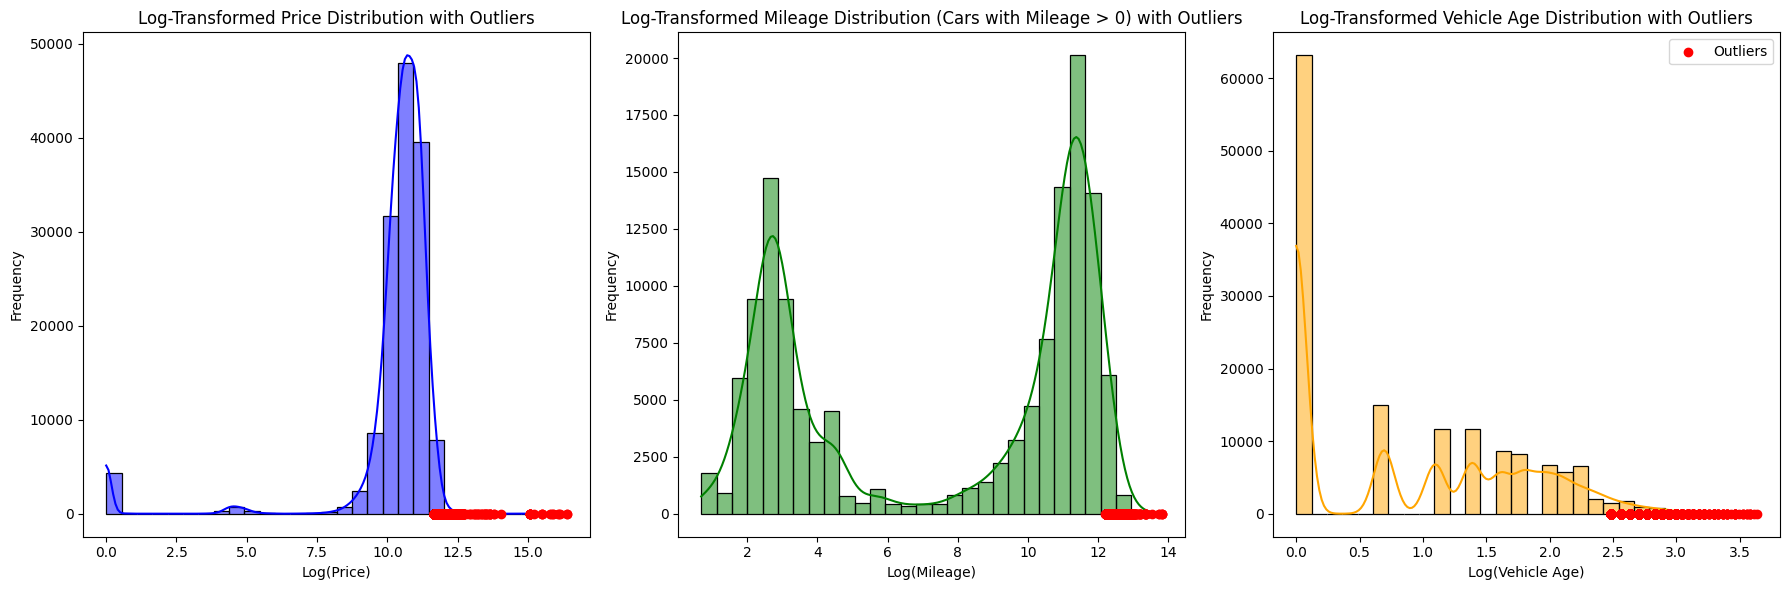

In [ ]:
# @title Distribution w/ Outliers


current_year = 2024
df['vehicle_age'] = current_year - df['model_year']

# Apply log transformation to price and vehicle_age
df['log_price'] = np.log1p(df['price'])
df['log_vehicle_age'] = np.log1p(df['vehicle_age'])

# Filter only cars with mileage greater than 0 for the mileage plot
df_mileage = df[df['mileage'] > 0]
df_mileage['log_mileage'] = np.log1p(df_mileage['mileage'])

# Function to detect outliers using the IQR method
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers for price, mileage, and vehicle age
outliers_price = detect_outliers('price')
outliers_mileage = detect_outliers('mileage')
outliers_vehicle_age = detect_outliers('vehicle_age')

# Plot histograms for the log-transformed data with outliers marked
plt.figure(figsize=(18, 6))

# Log-Transformed Price distribution with outliers
plt.subplot(1, 3, 1)
sns.histplot(df['log_price'], kde=True, color='blue', bins=30)
plt.scatter(np.log1p(outliers_price['price']), [-10]*len(outliers_price), color='red', label='Outliers', zorder=5)
plt.title('Log-Transformed Price Distribution with Outliers')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

# Log-Transformed Mileage distribution (Only for cars with mileage > 0) with outliers
plt.subplot(1, 3, 2)
sns.histplot(df_mileage['log_mileage'], kde=True, color='green', bins=30)
outliers_mileage_filtered = df_mileage[df_mileage.index.isin(outliers_mileage.index)]
plt.scatter(np.log1p(outliers_mileage_filtered['mileage']), [-10]*len(outliers_mileage_filtered), color='red', label='Outliers', zorder=5)
plt.title('Log-Transformed Mileage Distribution (Cars with Mileage > 0) with Outliers')
plt.xlabel('Log(Mileage)')
plt.ylabel('Frequency')

# Log-Transformed Vehicle Age distribution with outliers
plt.subplot(1, 3, 3)
sns.histplot(df['log_vehicle_age'], kde=True, color='orange', bins=30)
plt.scatter(np.log1p(outliers_vehicle_age['vehicle_age']), [-10]*len(outliers_vehicle_age), color='red', label='Outliers', zorder=5)
plt.title('Log-Transformed Vehicle Age Distribution with Outliers')
plt.xlabel('Log(Vehicle Age)')
plt.ylabel('Frequency')

# Show the legend and plots
plt.legend()
plt.tight_layout()
plt.show()

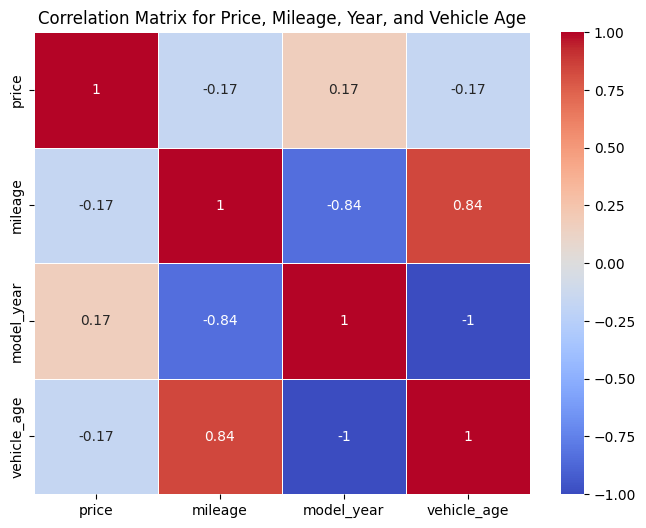

In [ ]:
# @title Correlation Matrix for Price, Mileage, Year, and Vehicle Age



current_year = 2024
df['vehicle_age'] = current_year - df['model_year']

# Select relevant columns for correlation
cols_to_correlate = ['price', 'mileage', 'model_year', 'vehicle_age']

# Calculate the correlation matrix
correlation_matrix = df[cols_to_correlate].corr()

# Display the correlation matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix for Price, Mileage, Year, and Vehicle Age')
plt.show()

# **IS THIS CORRECT???????????*

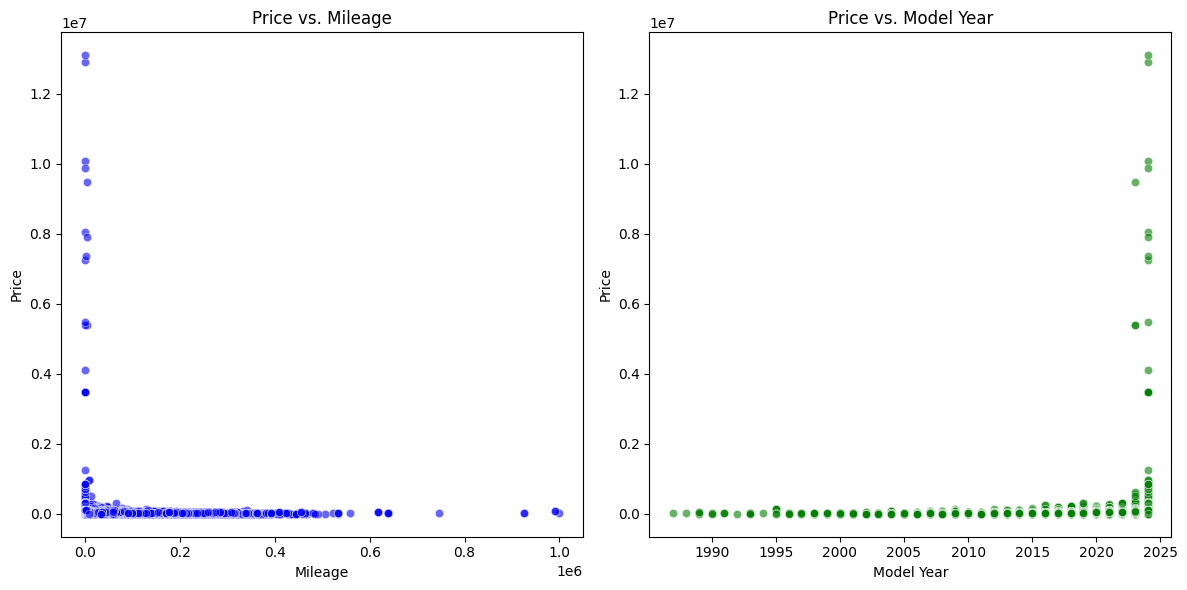

In [ ]:
# @title Scatter plot
# Scatter plot for Price vs. Mileage
plt.figure(figsize=(12, 6))

# Plot 1: Price vs Mileage
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='mileage', y='price', alpha=0.6, color='blue')
plt.title('Price vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')

# Scatter plot for Price vs. Year (model_year)
# Plot 2: Price vs Model Year
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='model_year', y='price', alpha=0.6, color='green')
plt.title('Price vs. Model Year')
plt.xlabel('Model Year')
plt.ylabel('Price')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# TOP 10 DEALERSHIPS

In [ ]:
print(df.columns)

Index(['listing_id', 'listing_heading', 'listing_type', 'listing_url',
       'listing_first_date', 'days_on_market', 'dealer_id', 'dealer_name',
       'dealer_street', 'dealer_city', 'dealer_province', 'dealer_postal_code',
       'Latitude', 'Longitude', 'Lat Lon', 'dealer_url', 'dealer_email',
       'dealer_phone', 'dealer_type', 'stock_type', 'vehicle_id', 'vin', 'uvc',
       'mileage', 'price', 'msrp', 'model_year', 'make', 'model', 'series',
       'style', 'certified', 'has_leather', 'has_navigation', 'exterior_color',
       'exterior_color_category', 'interior_color', 'interior_color_category',
       'price_analysis', 'wheelbase_from_vin', 'drivetrain_from_vin',
       'engine_from_vin', 'transmission_from_vin', 'fuel_type_from_vin',
       'number_price_changes', 'price_history_delimited', 'distance_to_dealer',
       'location_score', 'listing_dropoff_date'],
      dtype='object')


In [ ]:
# Atualize a agregação de sales_by_location para incluir o dealer_name
sales_by_location = df.groupby(['Latitude', 'Longitude', 'dealer_name']).agg(
    num_sales=('price', 'count'),         # Contar o número de vendas
    total_sales=('price', 'sum')          # Somar o preço total das vendas
).reset_index()  # Resetar o índice para garantir que dealer_name esteja no DataFrame

# Verificar se dealer_name agora está no DataFrame
print(sales_by_location.head())

# Realizar o merge com o DataFrame most_sold_maker usando 'dealer_name'
sales_by_location = pd.merge(sales_by_location, most_sold_maker[['dealer_name', 'make']], on='dealer_name', how='left')

# Continuar com o restante do código para criar o mapa



    Latitude   Longitude                                  dealer_name  \
0  22.445247  114.030416                              Ericksen Nissan   
1  53.274779 -113.547858                Leduc Chrysler Dodge Jeep Ram   
2  53.277309 -113.548286                                   L.A. Mazda   
3  53.278779 -113.545601                                  L.A. Nissan   
4  53.278779 -113.545601  The Truck Depot (A Division Of L.A. Nissan)   

   num_sales  total_sales  
0          4       121360  
1        439     25662845  
2       3210    166995646  
3        720     27099739  
4       1274     28599445  


In [ ]:
# Verifique se a coluna 'dealer_name' realmente existe
print(df.columns)  # Verifique se a coluna 'dealer_name' está presente no DataFrame original

# Agrupar por 'dealer_name' e 'make' para obter o mais vendido
most_sold_maker = df.groupby(['dealer_name', 'make']).size().reset_index(name='sales_count')

# Verifique as primeiras linhas para inspecionar o resultado
print(most_sold_maker.head())  # Verifique se 'dealer_name' está presente e populada

# Obter o 'make' mais vendido por dealership
most_sold_maker = most_sold_maker.loc[most_sold_maker.groupby('dealer_name')['sales_count'].idxmax()]

# Verifique o resultado do agrupamento
print(most_sold_maker.head())  # Verifique se 'dealer_name' e 'make' ainda estão presentes

sales_by_location['dealer_name'] = sales_by_location['dealer_name'].astype(str)
most_sold_maker['dealer_name'] = most_sold_maker['dealer_name'].astype(str)

# Tente realizar o merge novamente
sales_by_location = pd.merge(sales_by_location, most_sold_maker[['dealer_name', 'make']], on='dealer_name', how='left')


# Agora continue com o restante do código para criar o mapa


Index(['listing_id', 'listing_heading', 'listing_type', 'listing_url',
       'listing_first_date', 'days_on_market', 'dealer_id', 'dealer_name',
       'dealer_street', 'dealer_city', 'dealer_province', 'dealer_postal_code',
       'Latitude', 'Longitude', 'Lat Lon', 'dealer_url', 'dealer_email',
       'dealer_phone', 'dealer_type', 'stock_type', 'vehicle_id', 'vin', 'uvc',
       'mileage', 'price', 'msrp', 'model_year', 'make', 'model', 'series',
       'style', 'certified', 'has_leather', 'has_navigation', 'exterior_color',
       'exterior_color_category', 'interior_color', 'interior_color_category',
       'price_analysis', 'wheelbase_from_vin', 'drivetrain_from_vin',
       'engine_from_vin', 'transmission_from_vin', 'fuel_type_from_vin',
       'number_price_changes', 'price_history_delimited', 'distance_to_dealer',
       'location_score', 'listing_dropoff_date'],
      dtype='object')
         dealer_name       make  sales_count
0  1St Canadian Auto      Acura            1
1

In [ ]:
# Adicionar a coluna de "Maker" mais vendido por dealership
most_sold_maker = df.groupby(['dealer_name', 'make']).size().reset_index(name='sales_count')
most_sold_maker = most_sold_maker.loc[most_sold_maker.groupby('dealer_name')['sales_count'].idxmax()]
sales_by_location = pd.merge(sales_by_location, most_sold_maker[['dealer_name', 'make']], on='dealer_name', how='left')

# Criar o mapa
edmonton_map_unique = folium.Map(location=[53.5461, -113.4938], zoom_start=11)

# Adicionar marcadores no mapa
for index, row in sales_by_location.iterrows():
    location = [row['Latitude'], row['Longitude']]

    # Texto do popup com HTML para tamanho de fonte maior
    popup_text = f"""
    <div style='font-size:22px;'>
    <b>Dealer Name:</b> {row['dealer_name']}<br>
    <b>Number of Sales:</b> {row['num_sales']}<br>
    <b>Total Sales:</b> ${row['total_sales']:,}<br>
    <b>Most Sold Maker:</b> {row['make']}
    </div>
    """

    # Verificar se o dealer está na lista de cor laranja
    marker_color = 'orange' if row['dealer_name'] in orange_dealerships else 'blue'

    # Adicionar o marcador ao mapa
    folium.Marker(
        location=location,
        popup=folium.Popup(popup_text, max_width=300),  # Definir o popup com maior legibilidade
        icon=folium.Icon(icon='map-pin', prefix='fa', color=marker_color)
    ).add_to(edmonton_map_unique)

# Exibir o mapa
edmonton_map_unique

In [ ]:
# @title Edmonton's Dealerships (Go Auto in Orange)

# List of dealerships to color orange
orange_dealerships = [
    "Bavaria BMW", "Fusion Collision", "Genesis South Edmonton", "Go Auto Outlet Yellowhead", "Go Honda",
    "Go Kia South", "Go Mazda", "Go Nissan North", "Go Nissan South", "Go RV Edmonton",
    "Infiniti South Edmonton", "Jaguar Land Rover Edmonton", "Kentwood Ford",
    "Kentwood Ford Used Car Supercenter", "Norden Volkswagen", "Northstar Hyundai",
    "Porsche Centre Edmonton", "Southtown Chrysler", "Southtown Hyundai",
    "Team Ford", "Toyota on the Trail"
]

sales_by_location = df.groupby(['Latitude', 'Longitude','dealer_name']).agg(
    num_sales=('price', 'count'),         # Count the number of sales (number of rows)
    total_sales=('price', 'sum')          # Sum the price for total sales
).reset_index()

# Step 2: Create a base map centered around Edmonton (latitude: 53.5461, longitude: -113.4938)
edmonton_map_unique = folium.Map(location=[53.5461, -113.4938], zoom_start=11)

# Step 3: Add pinpoint markers for unique dealership locations
for index, row in sales_by_location.iterrows():
    # Define marker location
    location = [row['Latitude'], row['Longitude']]

    # Define popup text with sales info

    popup_text = f"Dealer Name: {row['dealer_name']}<br>Number of Sales: {row['num_sales']}<br>Total Sales: ${row['total_sales']:,}"

    # Check if the dealership is in the list for orange color
    if row['dealer_name'] in orange_dealerships:
        marker_color = 'orange'  # Use orange for specified dealerships
    else:
        marker_color = 'blue'  # Default to blue for others

    # Add a pinpoint marker for each dealership
    folium.Marker(
        location=location,
        popup=popup_text,
        icon=folium.Icon(icon='map-pin', prefix='fa', color=marker_color)  # Set marker color
    ).add_to(edmonton_map_unique)

# Step 4: Display the map with unique dealership locations
edmonton_map_unique

In [ ]:
# @title Dealership locations to the map with sales info
# Step 1: Calculate num_sales and total_sales for each dealership (group by Latitude and Longitude)
# Use the correct column names 'Latitude' and 'Longitude'
sales_by_location = df.groupby(['Latitude', 'Longitude']).agg(
    num_sales=('price', 'count'),         # Count the number of sales (number of rows)
    total_sales=('price', 'sum')          # Sum the price for total sales
).reset_index()

# Step 2: Create a base map centered around Edmonton (latitude: 53.5461, longitude: -113.4938)
edmonton_map = folium.Map(location=[53.5461, -113.4938], zoom_start=11)

# Step 3: Add dealership locations to the map with sales info
marker_cluster = MarkerCluster().add_to(edmonton_map)

for index, row in sales_by_location.iterrows():
    # Define marker location
    location = [row['Latitude'], row['Longitude']]

    # Define popup text with dealership sales info
    popup_text = f"Number of Sales: {row['num_sales']}<br>Total Sales: ${row['total_sales']:,}"

    # Add a circle marker for each dealership
    folium.CircleMarker(
        location=location,
        radius=row['num_sales'] / 10,  # Scale the marker size by the number of sales
        popup=popup_text,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(marker_cluster)

# Step 4: Display the map
edmonton_map

Change color for GoAuto Shops

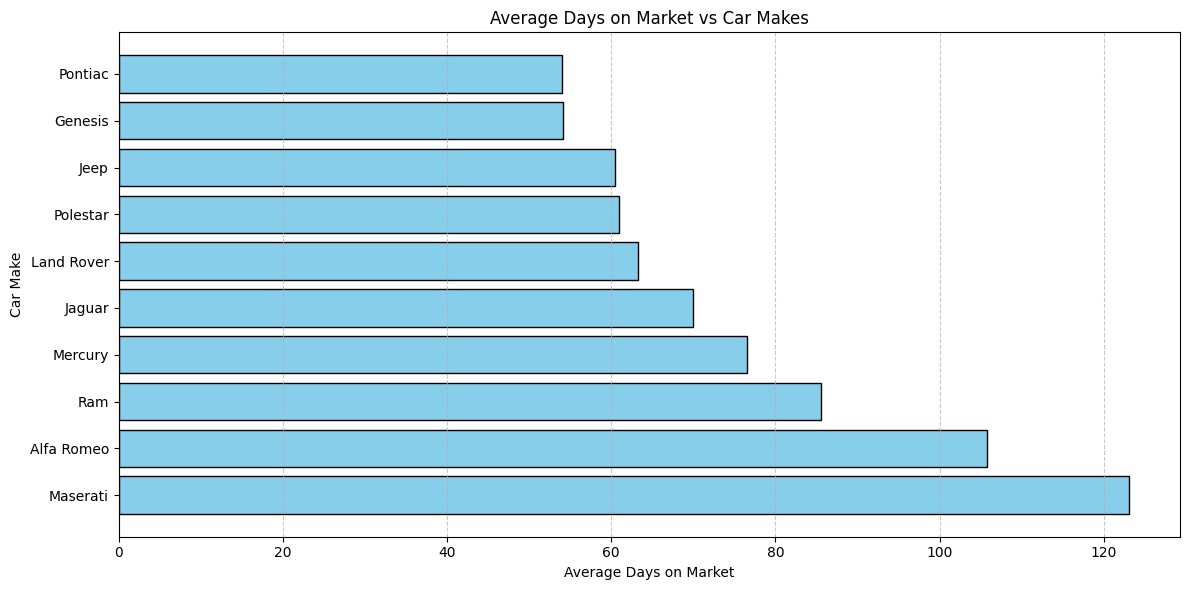

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('CBB_Listings_LongLat (2).csv')  # Ensure the path to your CSV is correct

# Grouping the data to find the average 'days_on_market' for each car make
average_days_on_market = df.groupby('make')['days_on_market'].mean().reset_index()

# Sorting the data by the average days on market in descending order
average_days_on_market = average_days_on_market.sort_values(by='days_on_market', ascending=False).head(10)  # Top 10 car makes for visualization

# Plotting the graph for Days on Market vs Car Makes
plt.figure(figsize=(12, 6))
plt.barh(average_days_on_market['make'], average_days_on_market['days_on_market'], color='skyblue', edgecolor='black')
plt.title('Average Days on Market vs Car Makes')
plt.xlabel('Average Days on Market')
plt.ylabel('Car Make')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


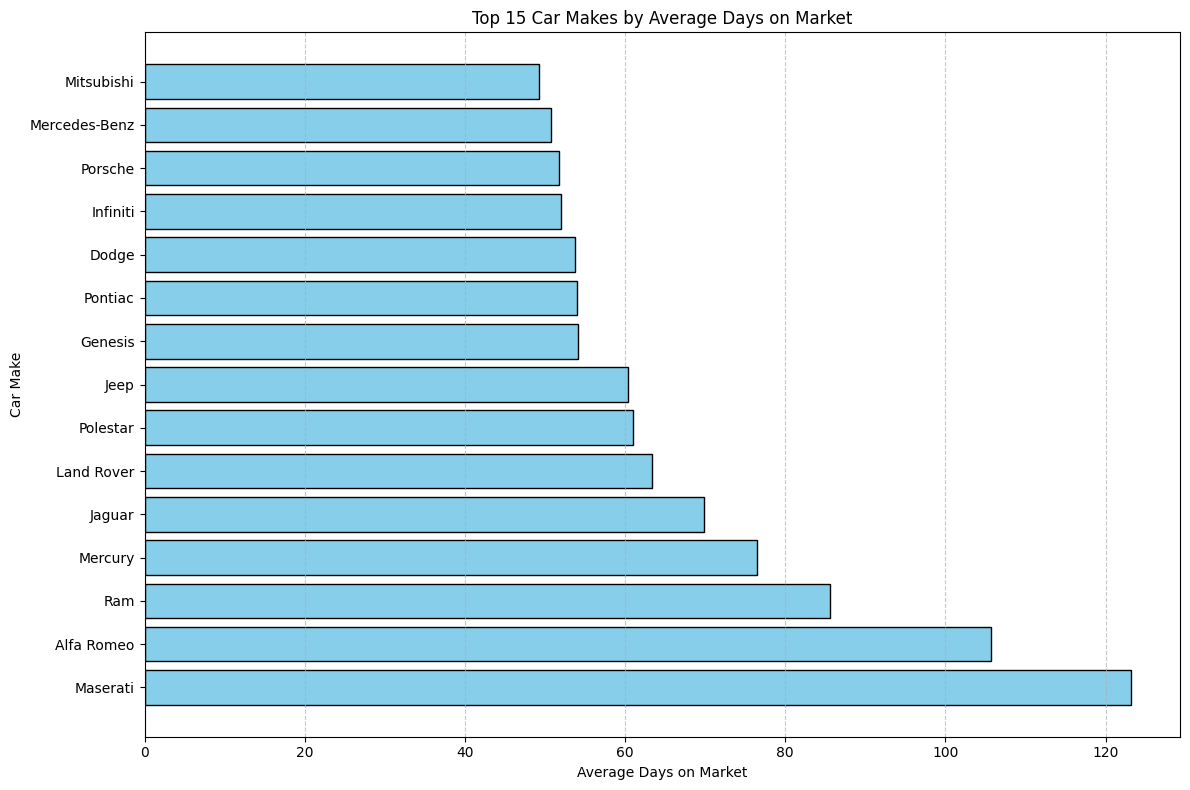

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('CBB_Listings_LongLat (2).csv')  # Ensure the path to your CSV is correct

# Grouping the data to find the average 'days_on_market' for each car make
average_days_on_market = df.groupby('make')['days_on_market'].mean().reset_index()

# Sorting the data by the average days on market in descending order and selecting the top 15
average_days_on_market_top15 = average_days_on_market.sort_values(by='days_on_market', ascending=False).head(15)

# Plotting the graph for Days on Market vs Car Makes for the top 15 makes
plt.figure(figsize=(12, 8))
plt.barh(average_days_on_market_top15['make'], average_days_on_market_top15['days_on_market'], color='skyblue', edgecolor='black')
plt.title('Top 15 Car Makes by Average Days on Market')
plt.xlabel('Average Days on Market')
plt.ylabel('Car Make')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


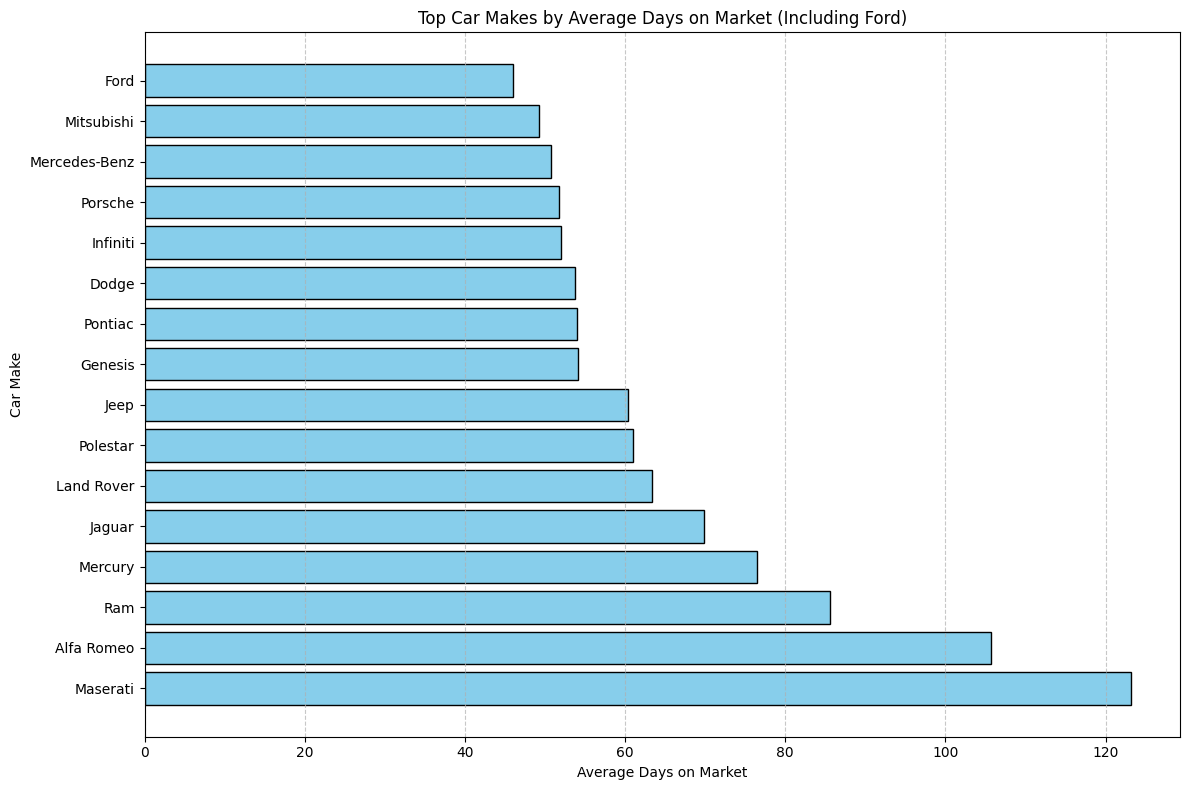

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('CBB_Listings_LongLat (2).csv')  # Ensure the path to your CSV is correct

# Grouping the data to find the average 'days_on_market' for each car make
average_days_on_market = df.groupby('make')['days_on_market'].mean().reset_index()

# Getting the top 15 makes plus 'Ford' if it's not already in the top
top_15_with_ford = average_days_on_market.sort_values(by='days_on_market', ascending=False).head(15)

# Check if 'Ford' is in the top 15, if not, append it
if 'Ford' not in top_15_with_ford['make'].values:
    ford_data = average_days_on_market[average_days_on_market['make'] == 'Ford']
    top_15_with_ford = pd.concat([top_15_with_ford, ford_data])

# Plotting the graph with 'Ford' included
plt.figure(figsize=(12, 8))
plt.barh(top_15_with_ford['make'], top_15_with_ford['days_on_market'], color='skyblue', edgecolor='black')
plt.title('Top Car Makes by Average Days on Market (Including Ford)')
plt.xlabel('Average Days on Market')
plt.ylabel('Car Make')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


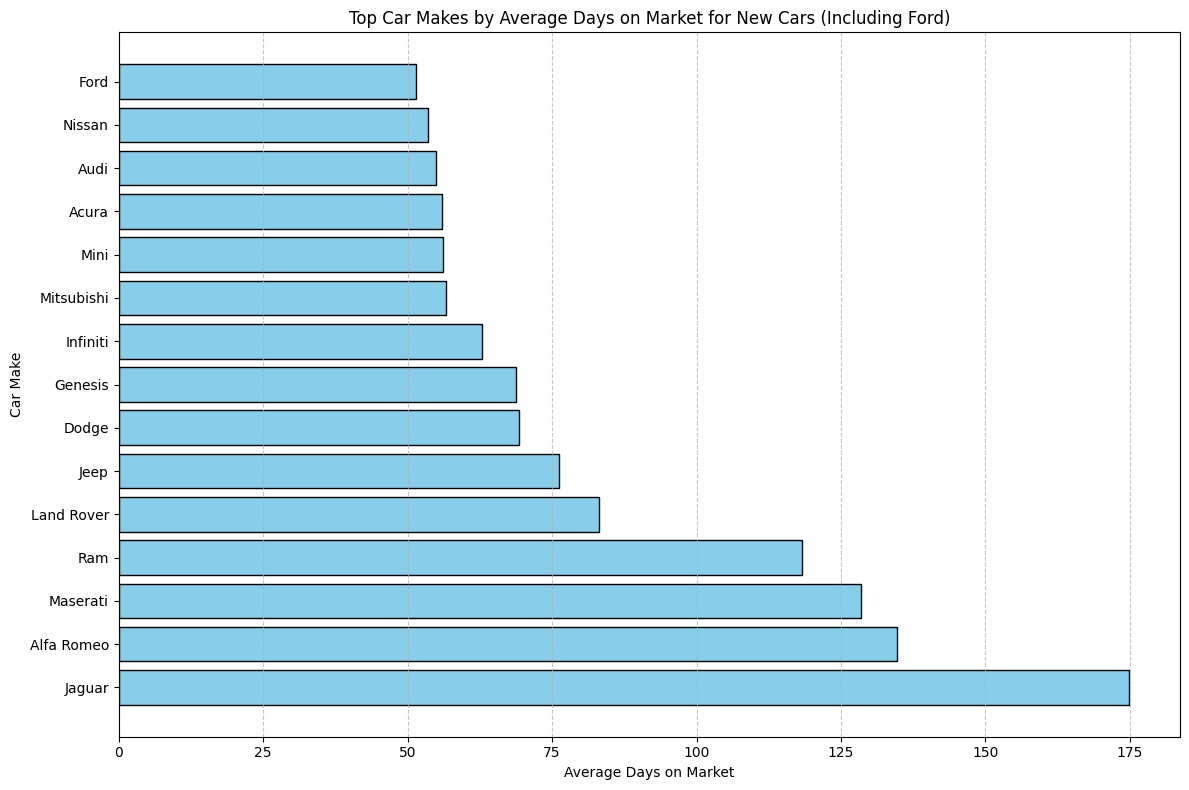

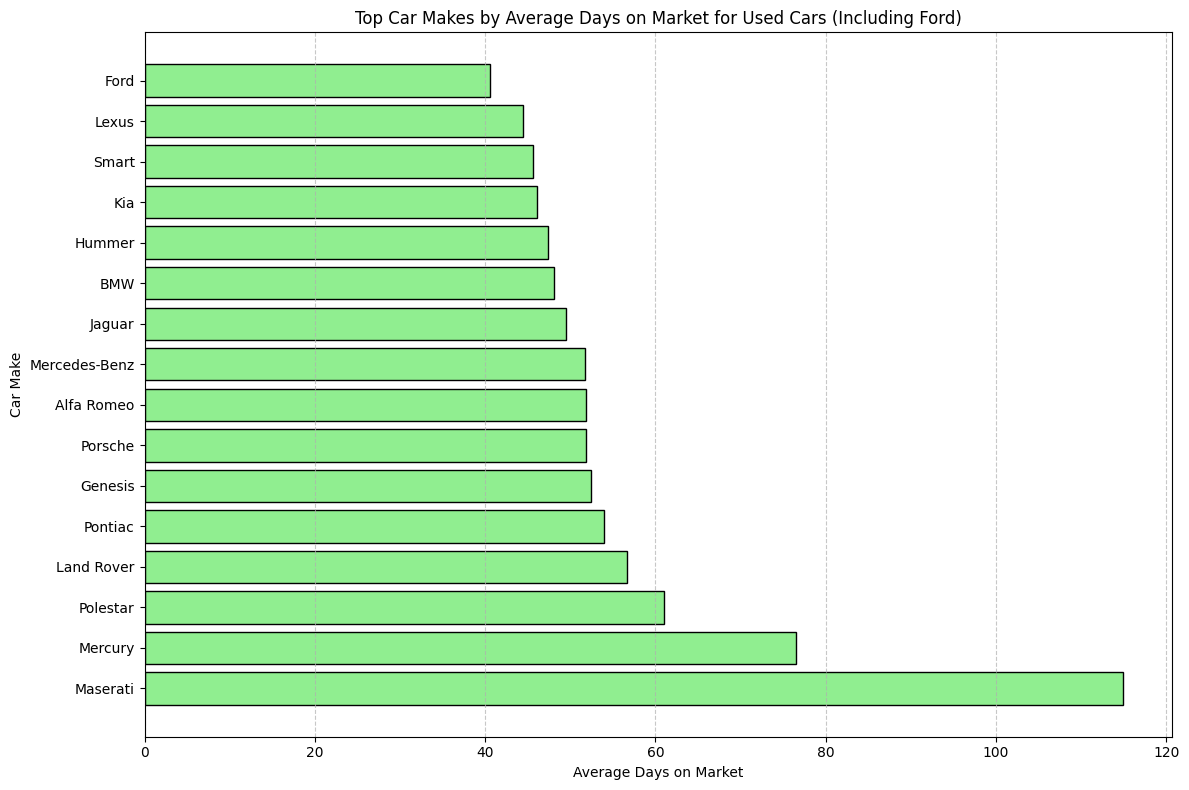

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('CBB_Listings_LongLat (2).csv')  # Ensure the path to your CSV is correct

# Separating data into new and used cars
new_cars_data = df[df['stock_type'] == 'NEW']
used_cars_data = df[df['stock_type'] == 'USED']

# Grouping data to find the average 'days_on_market' for each car make for new and used cars
average_days_on_market_new = new_cars_data.groupby('make')['days_on_market'].mean().reset_index()
average_days_on_market_used = used_cars_data.groupby('make')['days_on_market'].mean().reset_index()

# Getting the top 15 makes for new cars plus 'Ford' if it's not already in the top
top_15_new_with_ford = average_days_on_market_new.sort_values(by='days_on_market', ascending=False).head(15)
if 'Ford' not in top_15_new_with_ford['make'].values:
    ford_data_new = average_days_on_market_new[average_days_on_market_new['make'] == 'Ford']
    top_15_new_with_ford = pd.concat([top_15_new_with_ford, ford_data_new])

# Getting the top 15 makes for used cars plus 'Ford' if it's not already in the top
top_15_used_with_ford = average_days_on_market_used.sort_values(by='days_on_market', ascending=False).head(15)
if 'Ford' not in top_15_used_with_ford['make'].values:
    ford_data_used = average_days_on_market_used[average_days_on_market_used['make'] == 'Ford']
    top_15_used_with_ford = pd.concat([top_15_used_with_ford, ford_data_used])

# Plotting the graph for New Cars with 'Ford' included
plt.figure(figsize=(12, 8))
plt.barh(top_15_new_with_ford['make'], top_15_new_with_ford['days_on_market'], color='skyblue', edgecolor='black')
plt.title('Top Car Makes by Average Days on Market for New Cars (Including Ford)')
plt.xlabel('Average Days on Market')
plt.ylabel('Car Make')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting the graph for Used Cars with 'Ford' included
plt.figure(figsize=(12, 8))
plt.barh(top_15_used_with_ford['make'], top_15_used_with_ford['days_on_market'], color='lightgreen', edgecolor='black')
plt.title('Top Car Makes by Average Days on Market for Used Cars (Including Ford)')
plt.xlabel('Average Days on Market')
plt.ylabel('Car Make')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


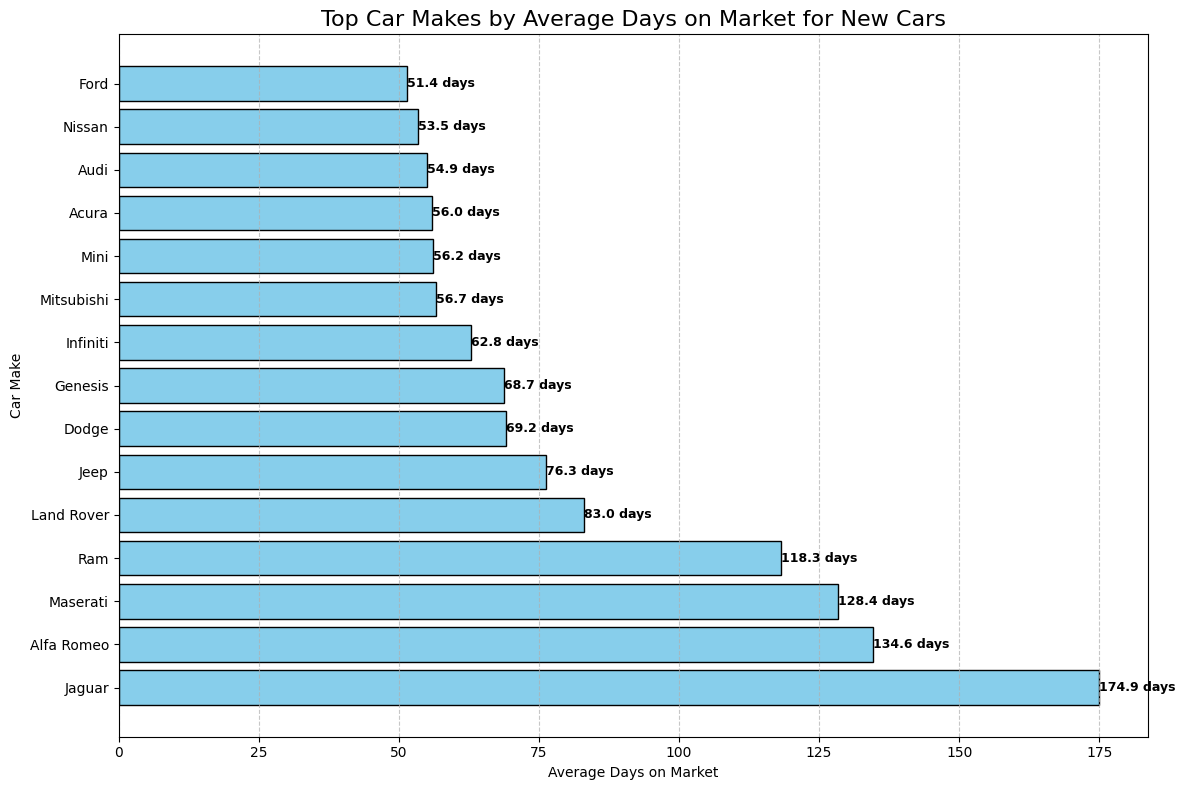

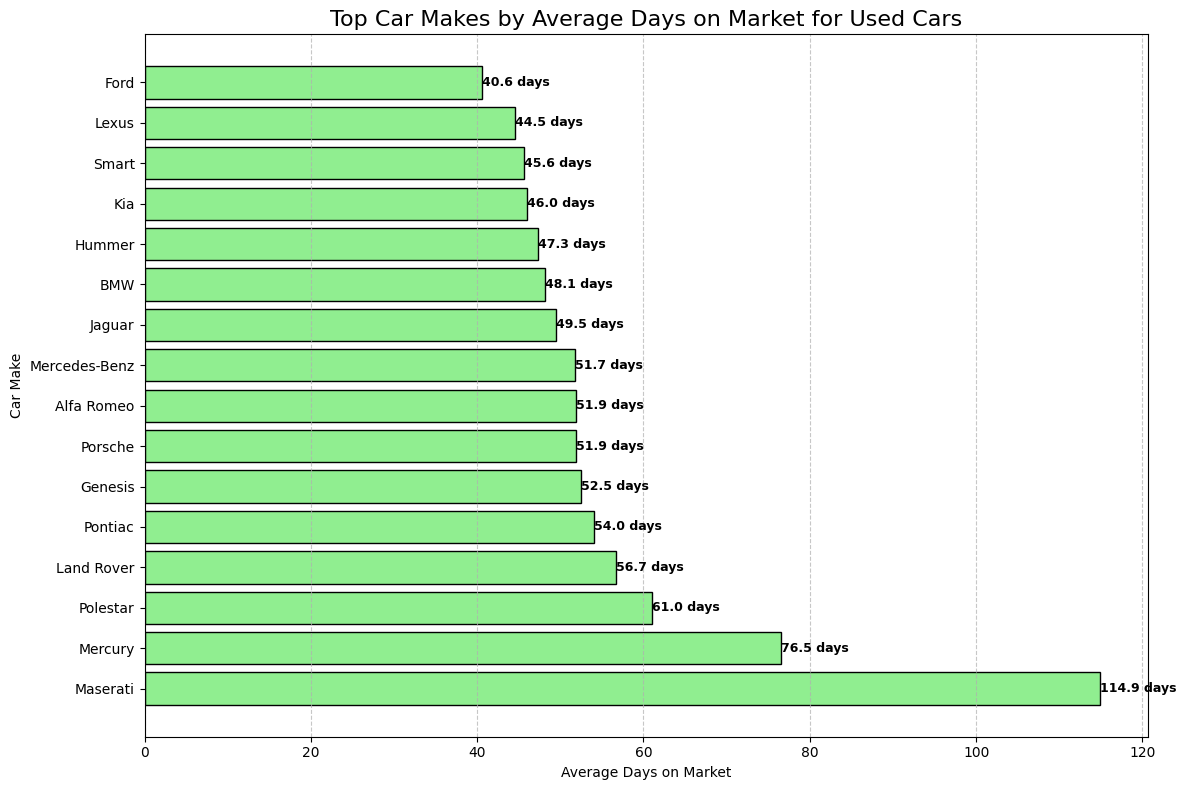

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('CBB_Listings_LongLat (2).csv')  # Ensure the path to your CSV is correct

# Separating data into new and used cars
new_cars_data = df[df['stock_type'] == 'NEW']
used_cars_data = df[df['stock_type'] == 'USED']

# Grouping data to find the average 'days_on_market' for each car make for new and used cars
average_days_on_market_new = new_cars_data.groupby('make')['days_on_market'].mean().reset_index()
average_days_on_market_used = used_cars_data.groupby('make')['days_on_market'].mean().reset_index()

# Getting the top 15 makes for new cars plus 'Ford' if it's not already in the top
top_15_new_with_ford = average_days_on_market_new.sort_values(by='days_on_market', ascending=False).head(15)
if 'Ford' not in top_15_new_with_ford['make'].values:
    ford_data_new = average_days_on_market_new[average_days_on_market_new['make'] == 'Ford']
    top_15_new_with_ford = pd.concat([top_15_new_with_ford, ford_data_new])

# Getting the top 15 makes for used cars plus 'Ford' if it's not already in the top
top_15_used_with_ford = average_days_on_market_used.sort_values(by='days_on_market', ascending=False).head(15)
if 'Ford' not in top_15_used_with_ford['make'].values:
    ford_data_used = average_days_on_market_used[average_days_on_market_used['make'] == 'Ford']
    top_15_used_with_ford = pd.concat([top_15_used_with_ford, ford_data_used])

# Plotting the graph for New Cars with 'Ford' included and displaying days on the graph
plt.figure(figsize=(12, 8))
plt.barh(top_15_new_with_ford['make'], top_15_new_with_ford['days_on_market'], color='skyblue', edgecolor='black')
for index, value in enumerate(top_15_new_with_ford['days_on_market']):
    plt.text(value, index, f'{value:.1f} days', va='center', fontsize=9, fontweight='bold')
plt.title('Top Car Makes by Average Days on Market for New Cars', fontsize=16)
plt.xlabel('Average Days on Market')
plt.ylabel('Car Make')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting the graph for Used Cars with 'Ford' included and displaying days on the graph
plt.figure(figsize=(12, 8))
plt.barh(top_15_used_with_ford['make'], top_15_used_with_ford['days_on_market'], color='lightgreen', edgecolor='black')
for index, value in enumerate(top_15_used_with_ford['days_on_market']):
    plt.text(value, index, f'{value:.1f} days', va='center', fontsize=9, fontweight='bold')
plt.title('Top Car Makes by Average Days on Market for Used Cars', fontsize=16)
plt.xlabel('Average Days on Market')
plt.ylabel('Car Make')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


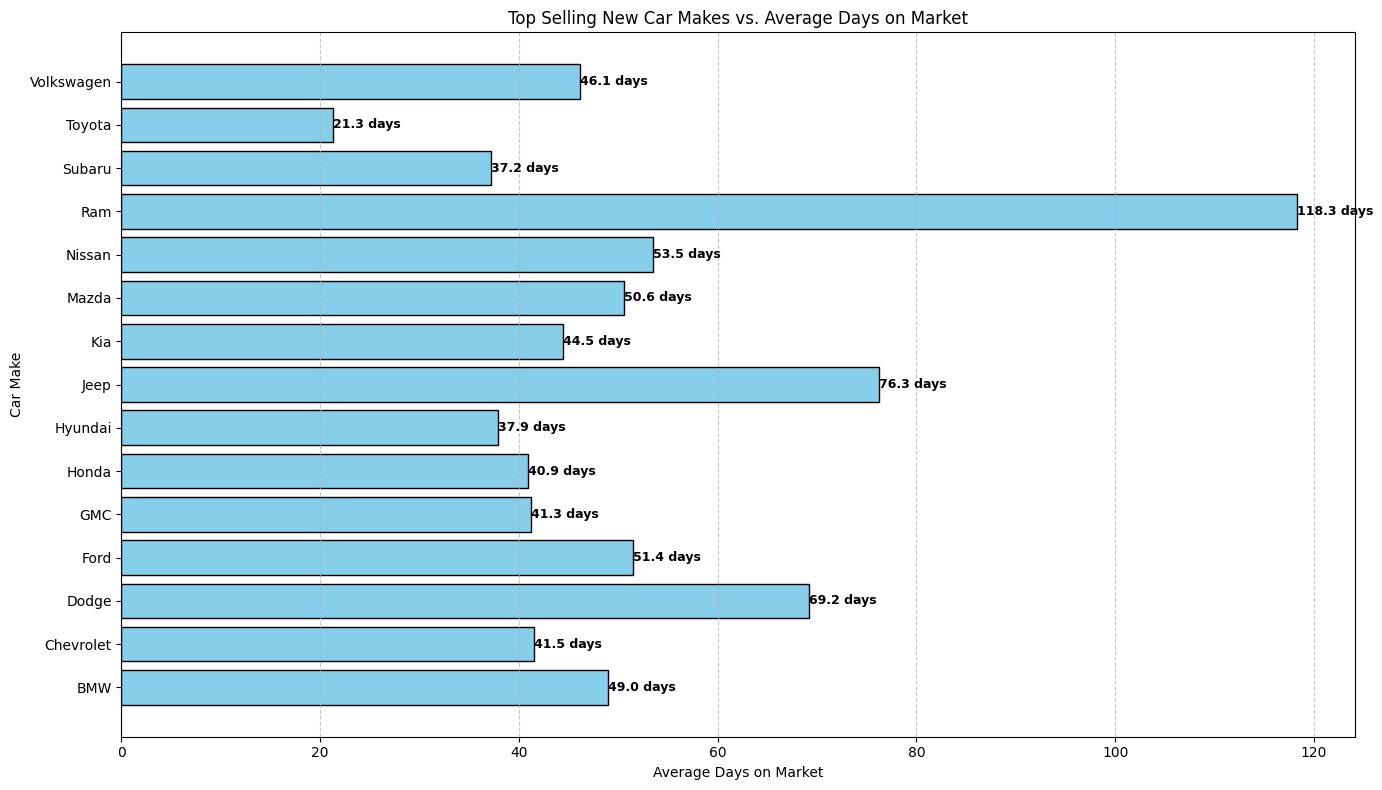

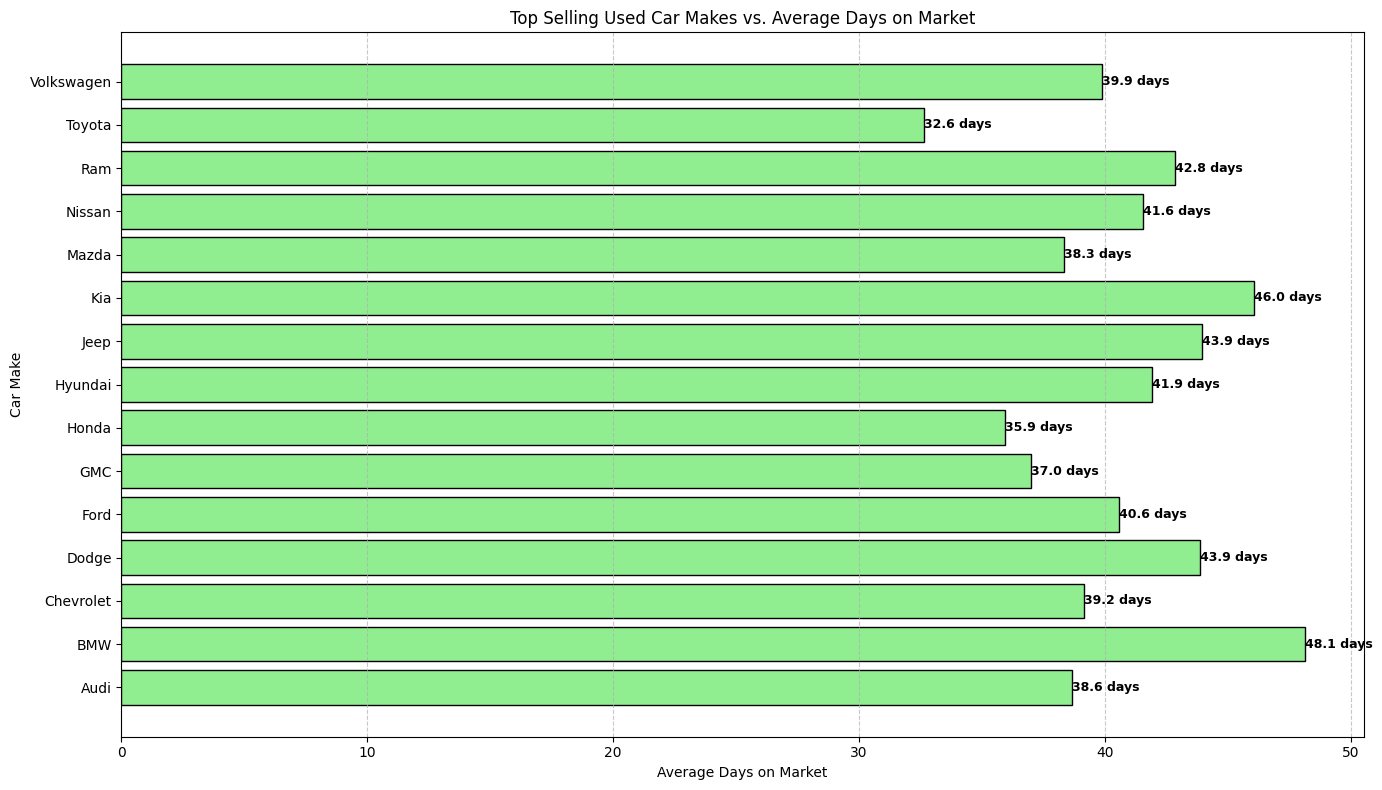

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('CBB_Listings_LongLat (2).csv')  # Ensure the path to your CSV is correct

# Separating data into new and used cars
new_cars_data = df[df['stock_type'] == 'NEW']
used_cars_data = df[df['stock_type'] == 'USED']

# Identifying the top-selling car makes and calculating their average days on market
# For new cars
top_selling_new = new_cars_data['make'].value_counts().head(15).index  # Get the top 15 selling makes
avg_days_top_selling_new = new_cars_data[new_cars_data['make'].isin(top_selling_new)].groupby('make')['days_on_market'].mean().reset_index()

# For used cars
top_selling_used = used_cars_data['make'].value_counts().head(15).index  # Get the top 15 selling makes
avg_days_top_selling_used = used_cars_data[used_cars_data['make'].isin(top_selling_used)].groupby('make')['days_on_market'].mean().reset_index()

# Plotting the graph for New Cars: Top Selling vs. Average Days on Market
plt.figure(figsize=(14, 8))
plt.barh(avg_days_top_selling_new['make'], avg_days_top_selling_new['days_on_market'], color='skyblue', edgecolor='black')
for index, value in enumerate(avg_days_top_selling_new['days_on_market']):
    plt.text(value, index, f'{value:.1f} days', va='center', fontsize=9, fontweight='bold')
plt.title('Top Selling New Car Makes vs. Average Days on Market')
plt.xlabel('Average Days on Market')
plt.ylabel('Car Make')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting the graph for Used Cars: Top Selling vs. Average Days on Market
plt.figure(figsize=(14, 8))
plt.barh(avg_days_top_selling_used['make'], avg_days_top_selling_used['days_on_market'], color='lightgreen', edgecolor='black')
for index, value in enumerate(avg_days_top_selling_used['days_on_market']):
    plt.text(value, index, f'{value:.1f} days', va='center', fontsize=9, fontweight='bold')
plt.title('Top Selling Used Car Makes vs. Average Days on Market')
plt.xlabel('Average Days on Market')
plt.ylabel('Car Make')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


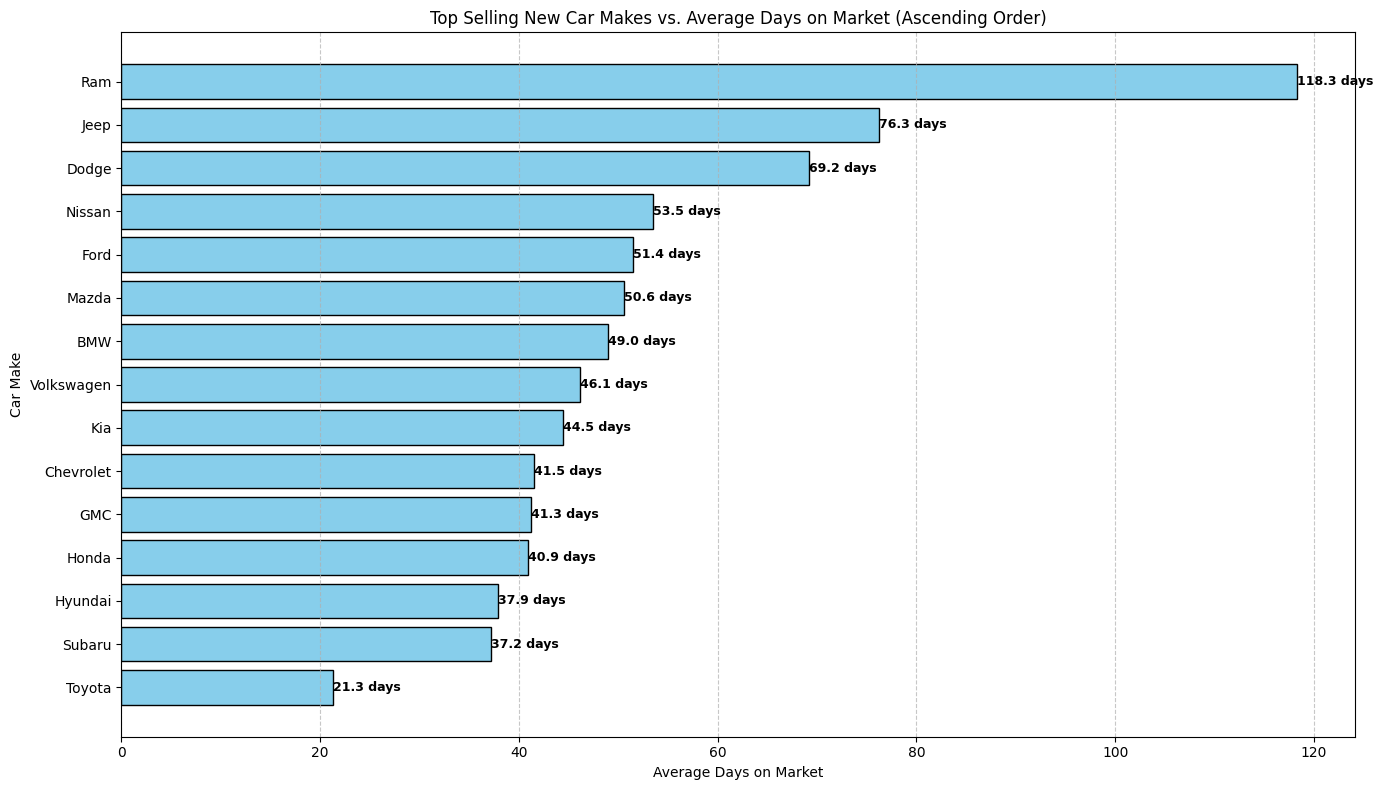

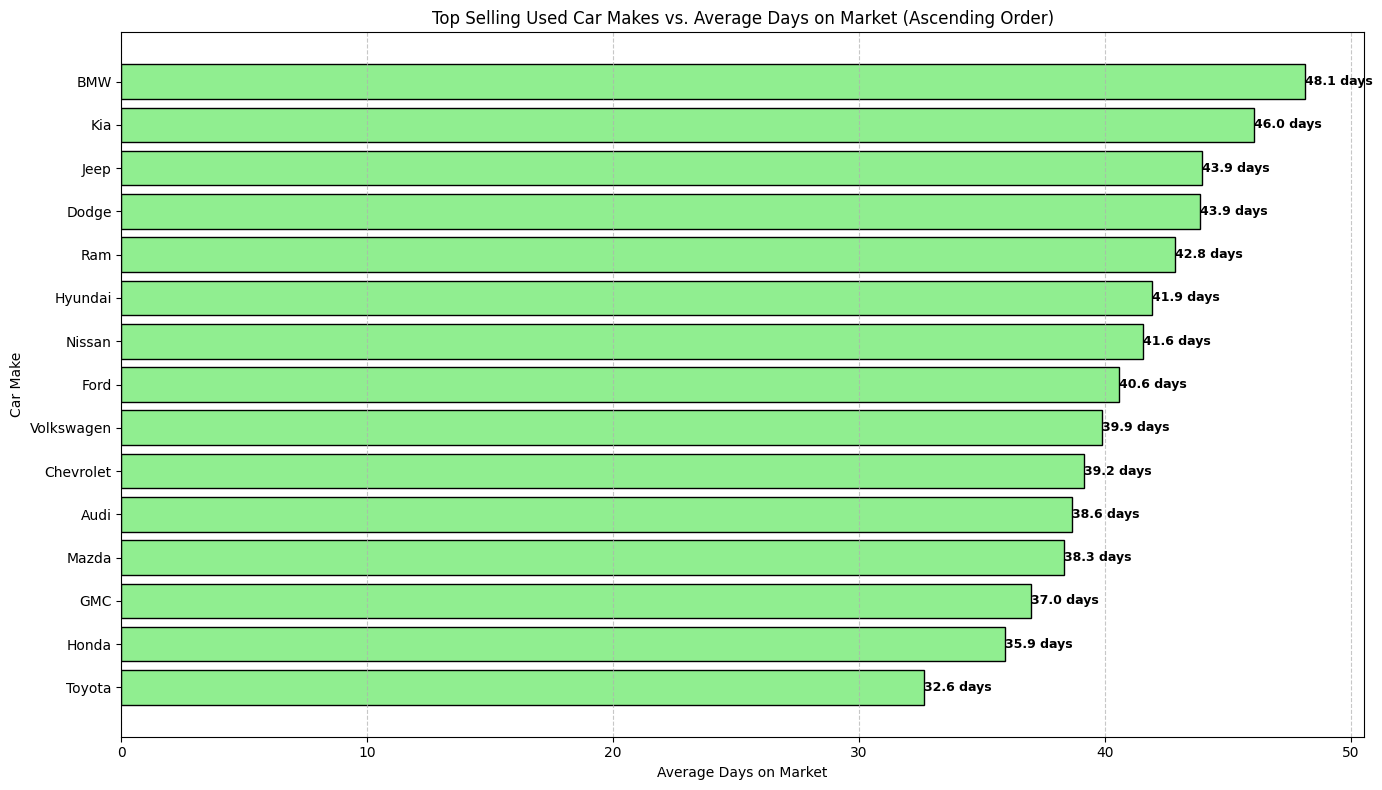

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('CBB_Listings_LongLat (2).csv')  # Ensure the path to your CSV is correct

# Separating data into new and used cars
new_cars_data = df[df['stock_type'] == 'NEW']
used_cars_data = df[df['stock_type'] == 'USED']

# Identifying the top-selling car makes and calculating their average days on market
# For new cars
top_selling_new = new_cars_data['make'].value_counts().head(15).index  # Get the top 15 selling makes
avg_days_top_selling_new = new_cars_data[new_cars_data['make'].isin(top_selling_new)].groupby('make')['days_on_market'].mean().reset_index()
avg_days_top_selling_new = avg_days_top_selling_new.sort_values(by='days_on_market', ascending=True)  # Sort in ascending order

# For used cars
top_selling_used = used_cars_data['make'].value_counts().head(15).index  # Get the top 15 selling makes
avg_days_top_selling_used = used_cars_data[used_cars_data['make'].isin(top_selling_used)].groupby('make')['days_on_market'].mean().reset_index()
avg_days_top_selling_used = avg_days_top_selling_used.sort_values(by='days_on_market', ascending=True)  # Sort in ascending order

# Plotting the graph for New Cars: Top Selling vs. Average Days on Market in ascending order
plt.figure(figsize=(14, 8))
plt.barh(avg_days_top_selling_new['make'], avg_days_top_selling_new['days_on_market'], color='skyblue', edgecolor='black')
for index, value in enumerate(avg_days_top_selling_new['days_on_market']):
    plt.text(value, index, f'{value:.1f} days', va='center', fontsize=9, fontweight='bold')
plt.title('Top Selling New Car Makes vs. Average Days on Market (Ascending Order)')
plt.xlabel('Average Days on Market')
plt.ylabel('Car Make')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting the graph for Used Cars: Top Selling vs. Average Days on Market in ascending order
plt.figure(figsize=(14, 8))
plt.barh(avg_days_top_selling_used['make'], avg_days_top_selling_used['days_on_market'], color='lightgreen', edgecolor='black')
for index, value in enumerate(avg_days_top_selling_used['days_on_market']):
    plt.text(value, index, f'{value:.1f} days', va='center', fontsize=9, fontweight='bold')
plt.title('Top Selling Used Car Makes vs. Average Days on Market (Ascending Order)')
plt.xlabel('Average Days on Market')
plt.ylabel('Car Make')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


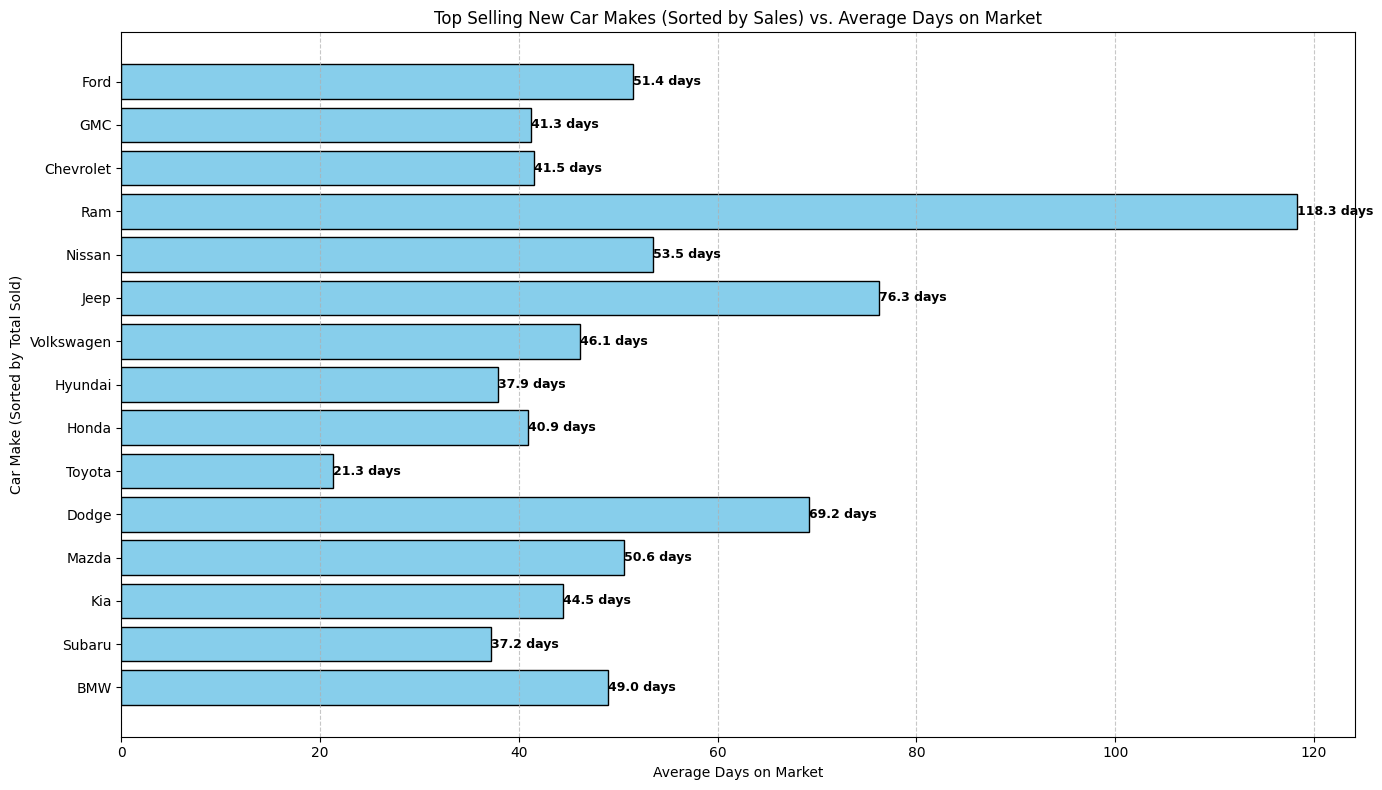

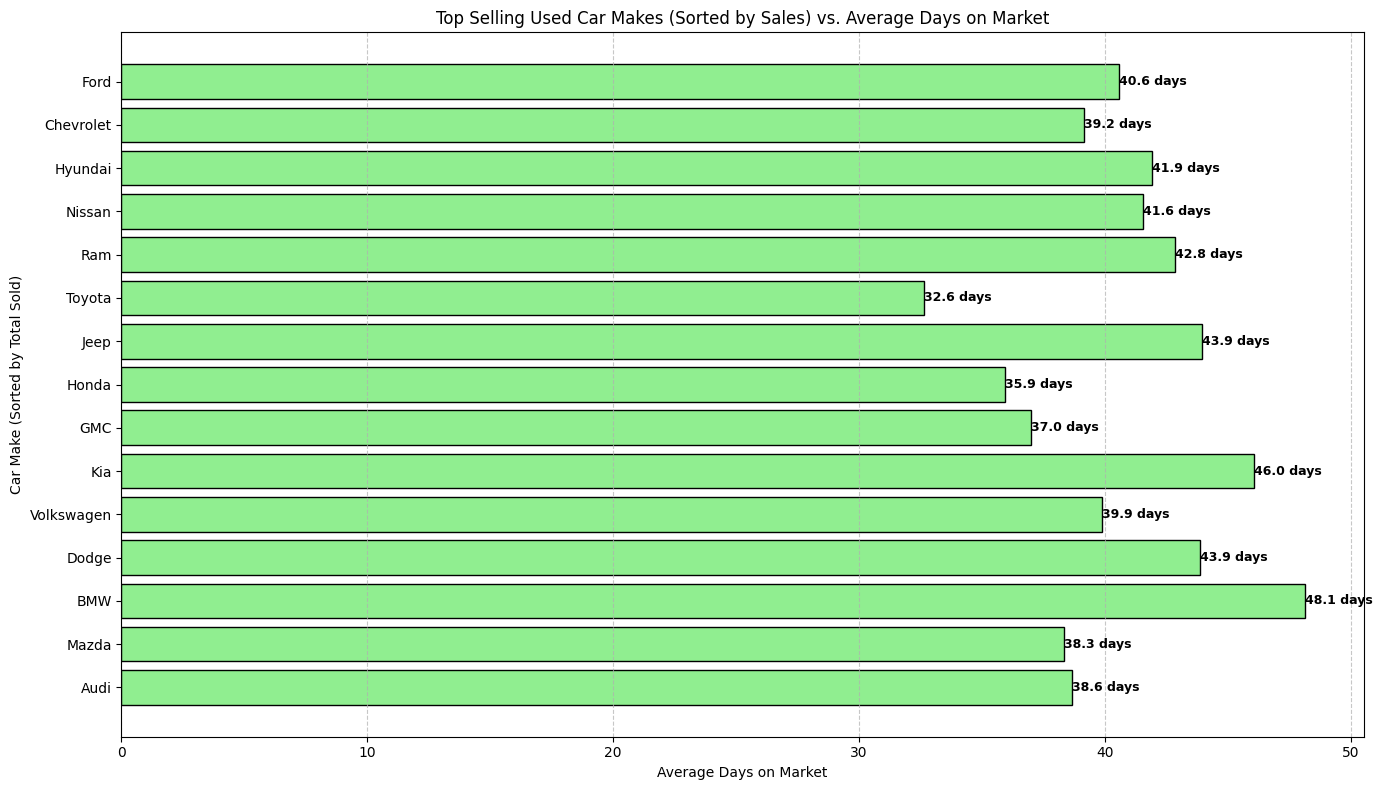

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('CBB_Listings_LongLat (2).csv')  # Ensure the path to your CSV is correct

# Separating data into new and used cars
new_cars_data = df[df['stock_type'] == 'NEW']
used_cars_data = df[df['stock_type'] == 'USED']

# For new cars
top_selling_new_counts = new_cars_data['make'].value_counts().head(15).reset_index()
top_selling_new_counts.columns = ['make', 'total_sold']
avg_days_top_selling_new = new_cars_data.groupby('make')['days_on_market'].mean().reset_index()
combined_new = pd.merge(top_selling_new_counts, avg_days_top_selling_new, on='make')
combined_new = combined_new.sort_values(by='total_sold', ascending=True)  # Sort by total cars sold in ascending order

# For used cars
top_selling_used_counts = used_cars_data['make'].value_counts().head(15).reset_index()
top_selling_used_counts.columns = ['make', 'total_sold']
avg_days_top_selling_used = used_cars_data.groupby('make')['days_on_market'].mean().reset_index()
combined_used = pd.merge(top_selling_used_counts, avg_days_top_selling_used, on='make')
combined_used = combined_used.sort_values(by='total_sold', ascending=True)  # Sort by total cars sold in ascending order

# Plotting the graph for New Cars: Most Sold Makes in ascending order with average days on market
plt.figure(figsize=(14, 8))
plt.barh(combined_new['make'], combined_new['days_on_market'], color='skyblue', edgecolor='black')
for index, value in enumerate(combined_new['days_on_market']):
    plt.text(value, index, f'{value:.1f} days', va='center', fontsize=9, fontweight='bold')
plt.title('Top Selling New Car Makes (Sorted by Sales) vs. Average Days on Market')
plt.xlabel('Average Days on Market')
plt.ylabel('Car Make (Sorted by Total Sold)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting the graph for Used Cars: Most Sold Makes in ascending order with average days on market
plt.figure(figsize=(14, 8))
plt.barh(combined_used['make'], combined_used['days_on_market'], color='lightgreen', edgecolor='black')
for index, value in enumerate(combined_used['days_on_market']):
    plt.text(value, index, f'{value:.1f} days', va='center', fontsize=9, fontweight='bold')
plt.title('Top Selling Used Car Makes (Sorted by Sales) vs. Average Days on Market')
plt.xlabel('Average Days on Market')
plt.ylabel('Car Make (Sorted by Total Sold)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Fuel Type vs. Average Price and Days on Market


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('CBB_Listings_LongLat.csv')  # Ensure the path to your CSV is correct

# Calculating average price and average days on market for each fuel type
fuel_stats = df.groupby('fuel_type_from_vin').agg({'price': 'mean', 'days_on_market': 'mean'}).reset_index()

# Plotting Fuel Type vs. Average Price and Days on Market
fig, ax1 = plt.subplots(figsize=(14, 8))

ax2 = ax1.twinx()
ax1.bar(fuel_stats['fuel_type_from_vin'], fuel_stats['price'], color='skyblue', label='Average Price')
ax2.bar(fuel_stats['fuel_type_from_vin'], fuel_stats['days_on_market'], color='lightgreen', alpha=0.6, label='Average Days on Market')

ax1.set_xlabel('Fuel Type')
ax1.set_ylabel('Average Price ($)', color='blue')
ax2.set_ylabel('Average Days on Market', color='green')
plt.title('Fuel Type vs. Average Price and Days on Market')
fig.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##Sales Distribution by Model Year (New vs. Used)

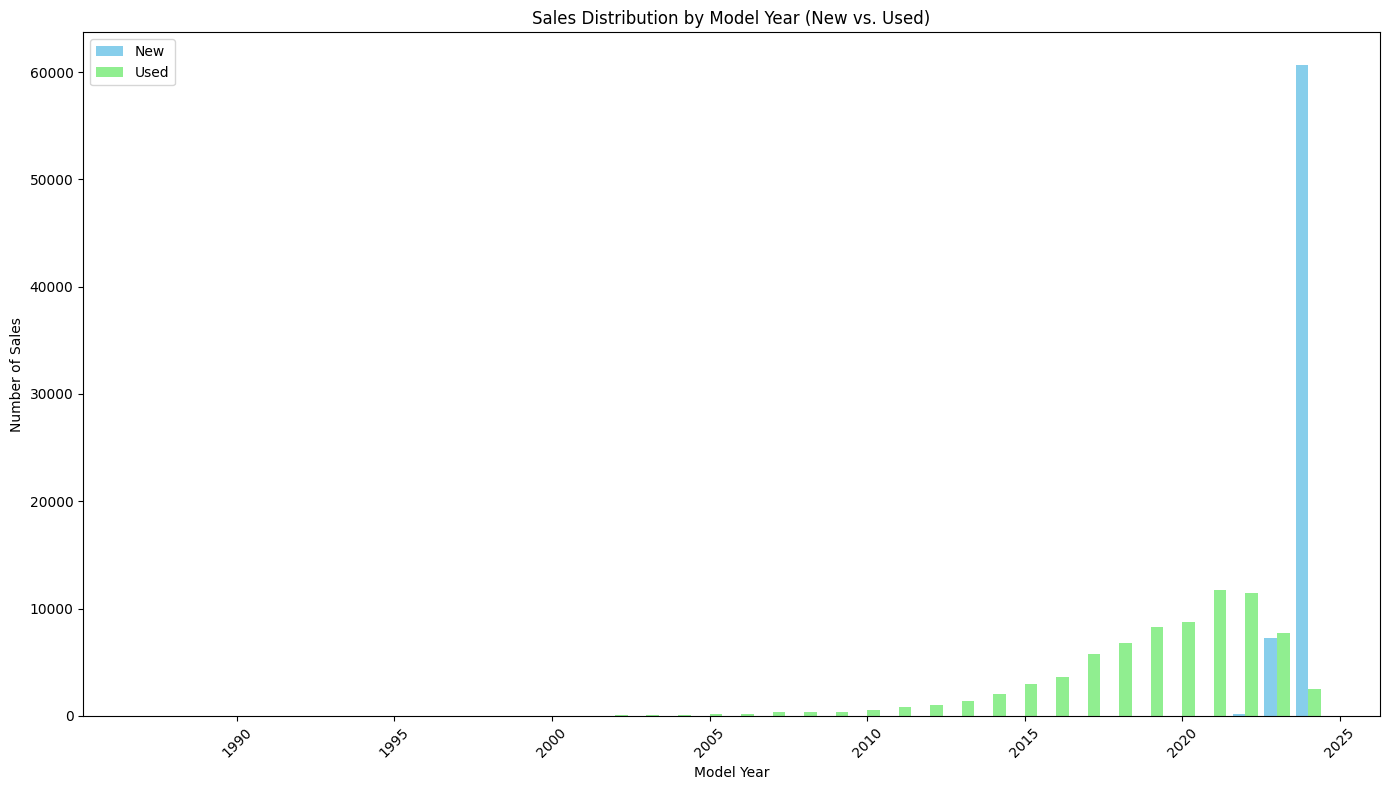

In [ ]:
# Separate new and used cars
new_cars = df[df['stock_type'] == 'NEW']
used_cars = df[df['stock_type'] == 'USED']

# Count the number of sales by model year
new_sales_by_year = new_cars['model_year'].value_counts().sort_index()
used_sales_by_year = used_cars['model_year'].value_counts().sort_index()

# Plotting Sales Distribution by Model Year (New vs. Used)
plt.figure(figsize=(14, 8))
plt.bar(new_sales_by_year.index - 0.2, new_sales_by_year.values, width=0.4, label='New', color='skyblue')
plt.bar(used_sales_by_year.index + 0.2, used_sales_by_year.values, width=0.4, label='Used', color='lightgreen')

plt.xlabel('Model Year')
plt.ylabel('Number of Sales')
plt.title('Sales Distribution by Model Year (New vs. Used)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Mileage vs. Price Scatter Plot with Trend Line

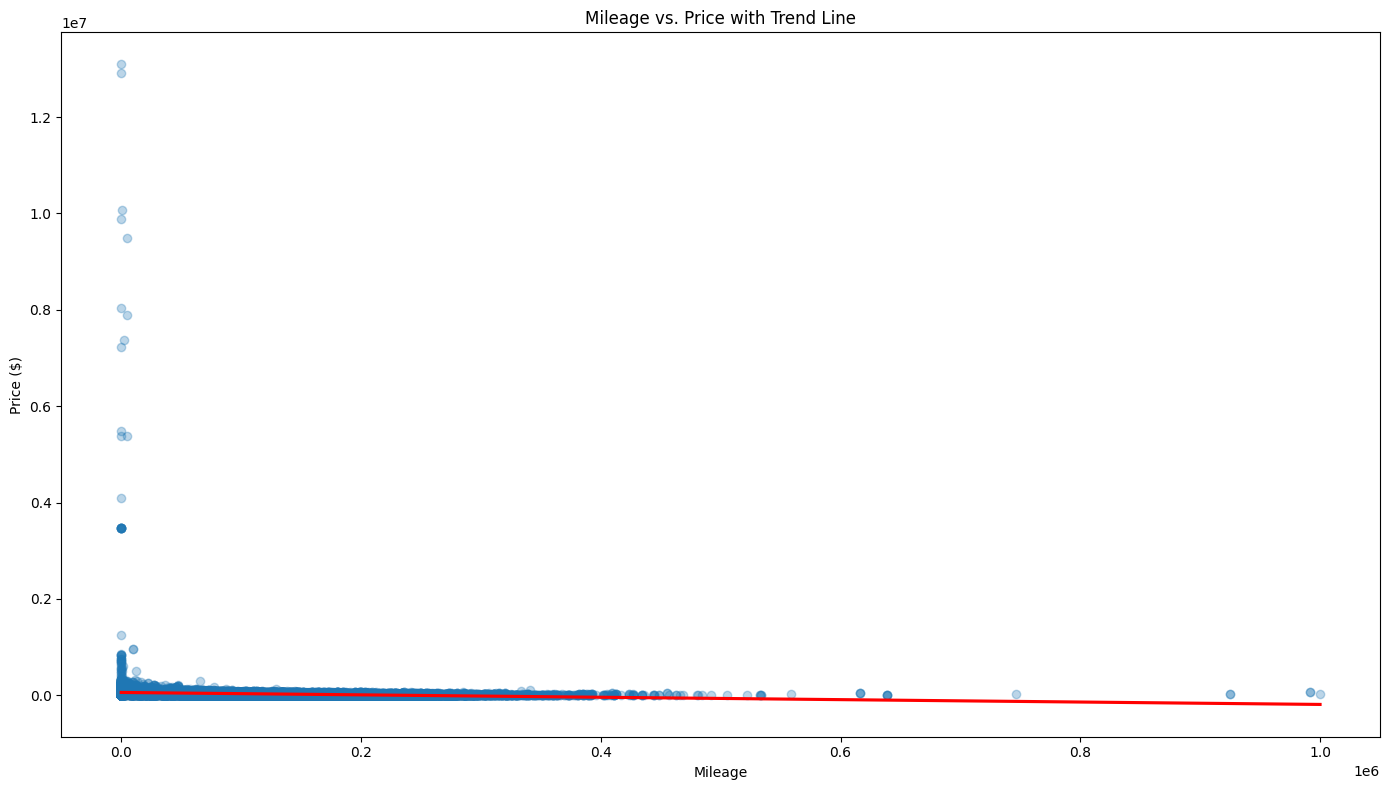

In [ ]:


# Plotting Mileage vs. Price Scatter Plot with Trend Line
plt.figure(figsize=(14, 8))
sns.regplot(x='mileage', y='price', data=df, scatter_kws={'alpha':0.3}, line_kws={"color":"red"})
plt.title('Mileage vs. Price with Trend Line')
plt.xlabel('Mileage')
plt.ylabel('Price ($)')
plt.tight_layout()
plt.show()


## Monthly Sales Trend Analysis

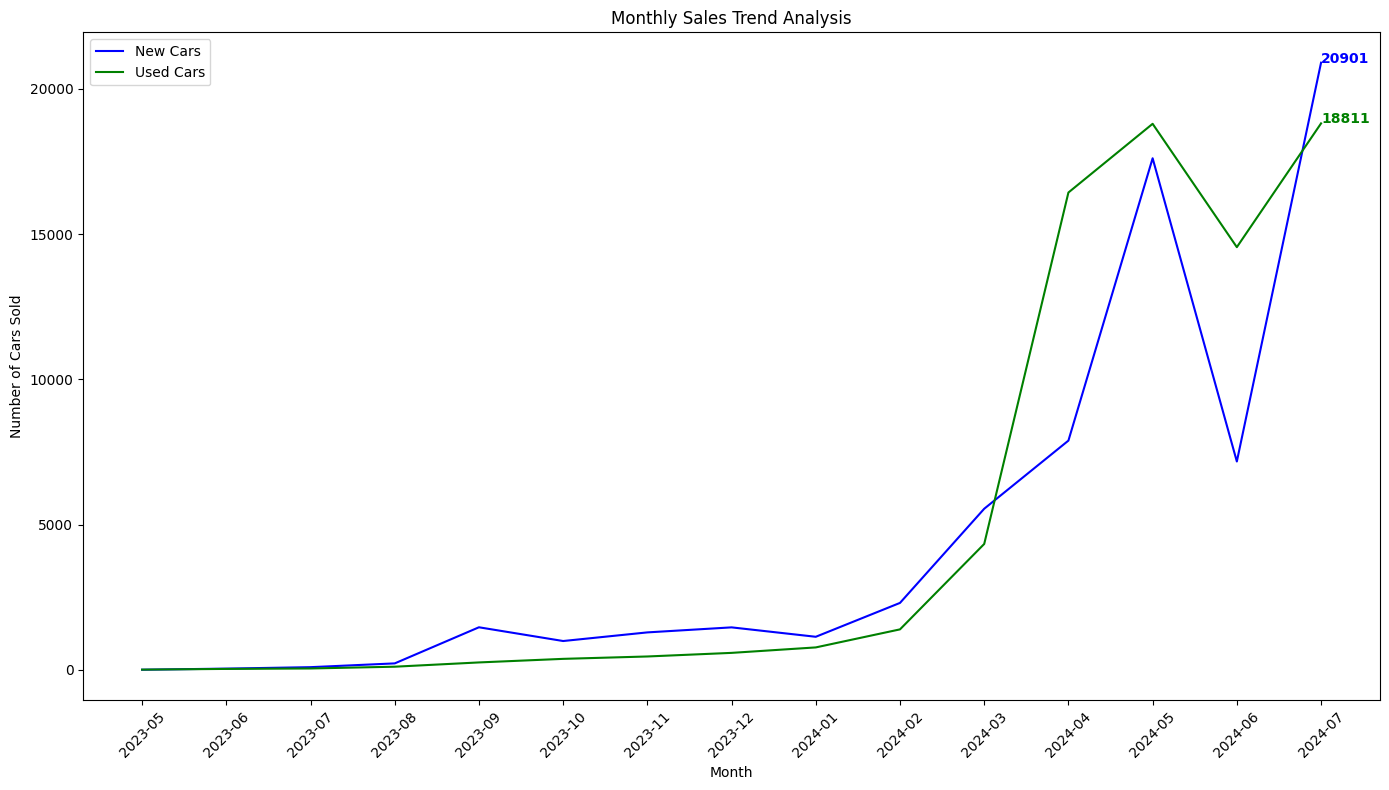

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('CBB_Listings_LongLat (2).csv')  # Ensure the path to your CSV is correct

# Convert listing_first_date to datetime if not already converted
df['listing_first_date'] = pd.to_datetime(df['listing_first_date'], errors='coerce')

# Extracting month and year
df['month'] = df['listing_first_date'].dt.to_period('M')
monthly_sales = df.groupby(['month', 'stock_type']).size().unstack()

# Plotting Monthly Sales Trend Analysis
plt.figure(figsize=(14, 8))
plt.plot(monthly_sales.index.astype(str), monthly_sales['NEW'], label='New Cars', color='blue')
plt.plot(monthly_sales.index.astype(str), monthly_sales['USED'], label='Used Cars', color='green')

# Adding the maximum value at the end of each line
max_new_value = monthly_sales['NEW'].max()
max_used_value = monthly_sales['USED'].max()
max_new_index = monthly_sales['NEW'].idxmax()
max_used_index = monthly_sales['USED'].idxmax()

plt.text(str(max_new_index), max_new_value, f'{max_new_value}', color='blue', fontsize=10, fontweight='bold', ha='left')
plt.text(str(max_used_index), max_used_value, f'{max_used_value}', color='green', fontsize=10, fontweight='bold', ha='left')

plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.title('Monthly Sales Trend Analysis')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##Top 5 Brands vs. Certification Status (Certified vs. Non-Certified)

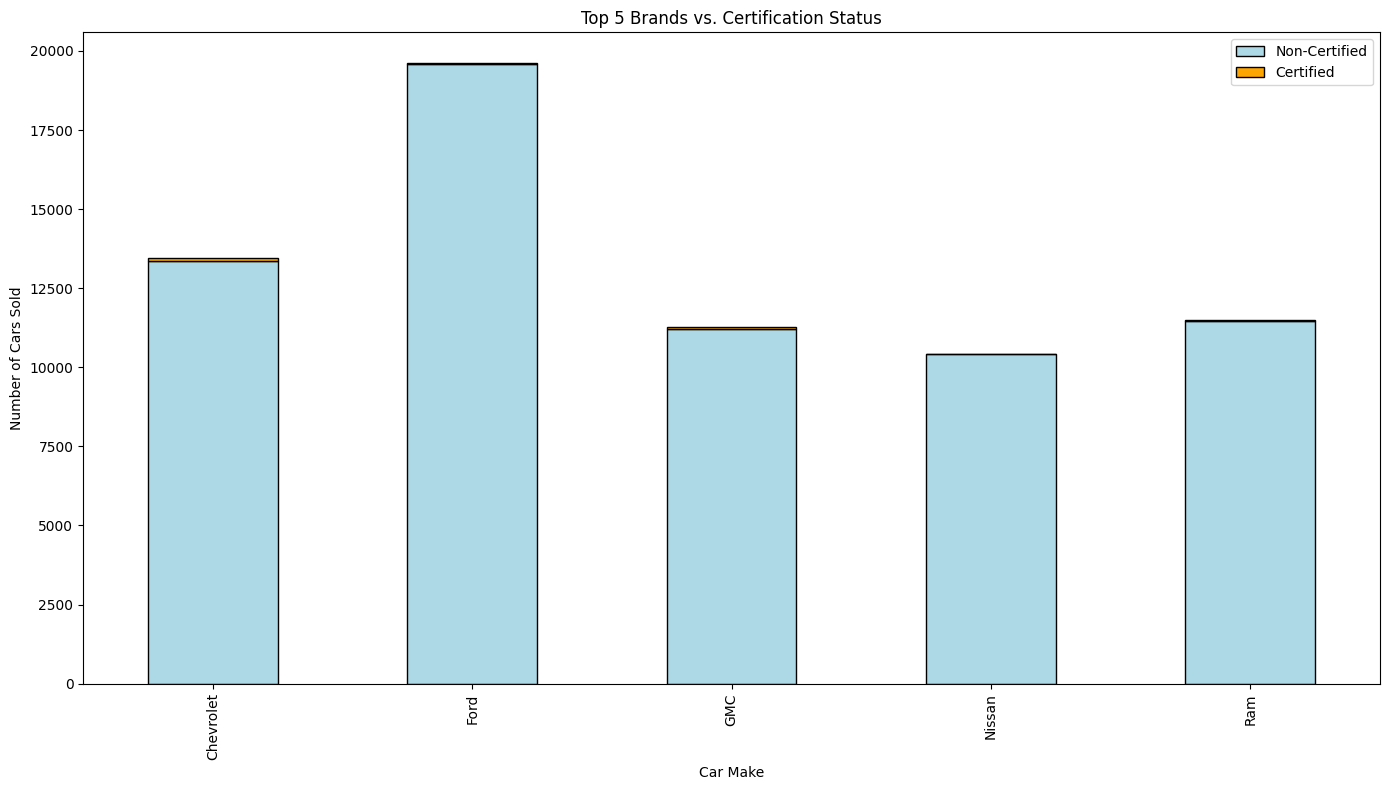

In [ ]:
# Getting top 5 brands
top_brands = df['make'].value_counts().head(5).index

# Filtering dataset for top 5 brands and certification status
top_brands_data = df[df['make'].isin(top_brands)]
certification_stats = top_brands_data.groupby(['make', 'certified']).size().unstack().fillna(0)

# Plotting Top 5 Brands vs. Certification Status
certification_stats.plot(kind='bar', stacked=True, figsize=(14, 8), color=['lightblue', 'orange'], edgecolor='black')
plt.title('Top 5 Brands vs. Certification Status')
plt.xlabel('Car Make')
plt.ylabel('Number of Cars Sold')
plt.legend(['Non-Certified', 'Certified'])
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

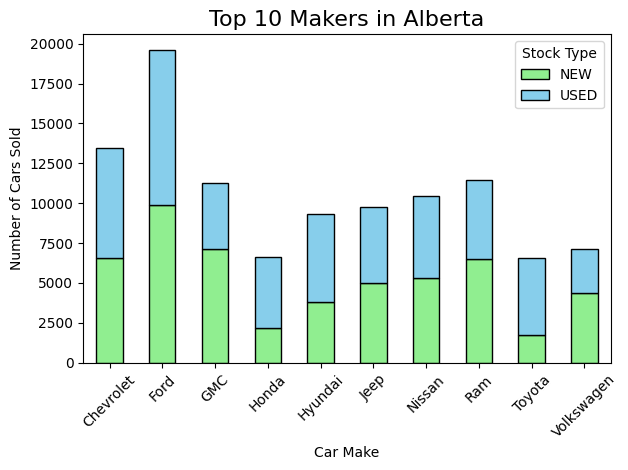

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('CBB_Listings_LongLat (2).csv')  # Ensure the path to your CSV is correct

# Find the top 10 car makes by total count (new + used)
top_10_makes = df['make'].value_counts().head(10).index

# Filter the dataset for the top 10 makes
top_10_data = df[df['make'].isin(top_10_makes)]

# Group the data by 'make' and 'stock_type' (new or used), then count the number of cars
grouped_data = top_10_data.groupby(['make', 'stock_type']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
plt.figure(figsize=(14, 8))
grouped_data.plot(kind='bar', stacked=True, color=['lightgreen', 'skyblue'], edgecolor='black')

# Adding titles and labels
plt.title('Top 10 Makers in Alberta', fontsize=16)
plt.xlabel('Car Make')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.legend(title='Stock Type', loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()


<Figure size 1400x800 with 0 Axes>

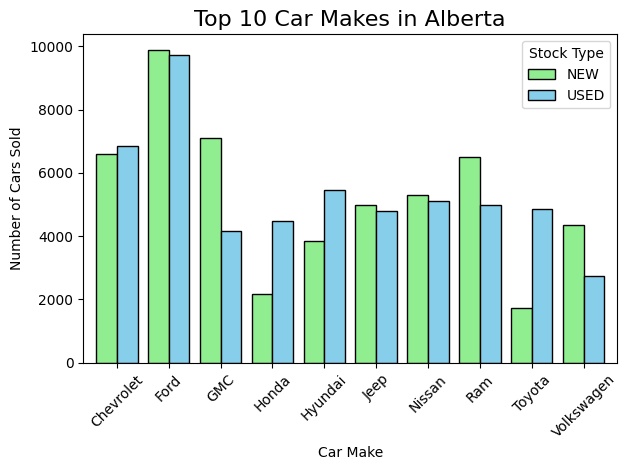

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('CBB_Listings_LongLat (2).csv')  # Ensure the path to your CSV is correct

# Find the top 10 car makes by total count (new + used)
top_10_makes = df['make'].value_counts().head(10).index

# Filter the dataset for the top 10 makes
top_10_data = df[df['make'].isin(top_10_makes)]

# Group the data by 'make' and 'stock_type' (new or used), then count the number of cars
grouped_data = top_10_data.groupby(['make', 'stock_type']).size().unstack(fill_value=0)

# Plotting the bar chart with two bars (new and used) for each car make
plt.figure(figsize=(14, 8))
grouped_data.plot(kind='bar', stacked=False, color=['lightgreen', 'skyblue'], edgecolor='black', width=0.8)

# Adding titles and labels
plt.title('Top 10 Car Makes in Alberta', fontsize=16)
plt.xlabel('Car Make')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.legend(title='Stock Type', loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()


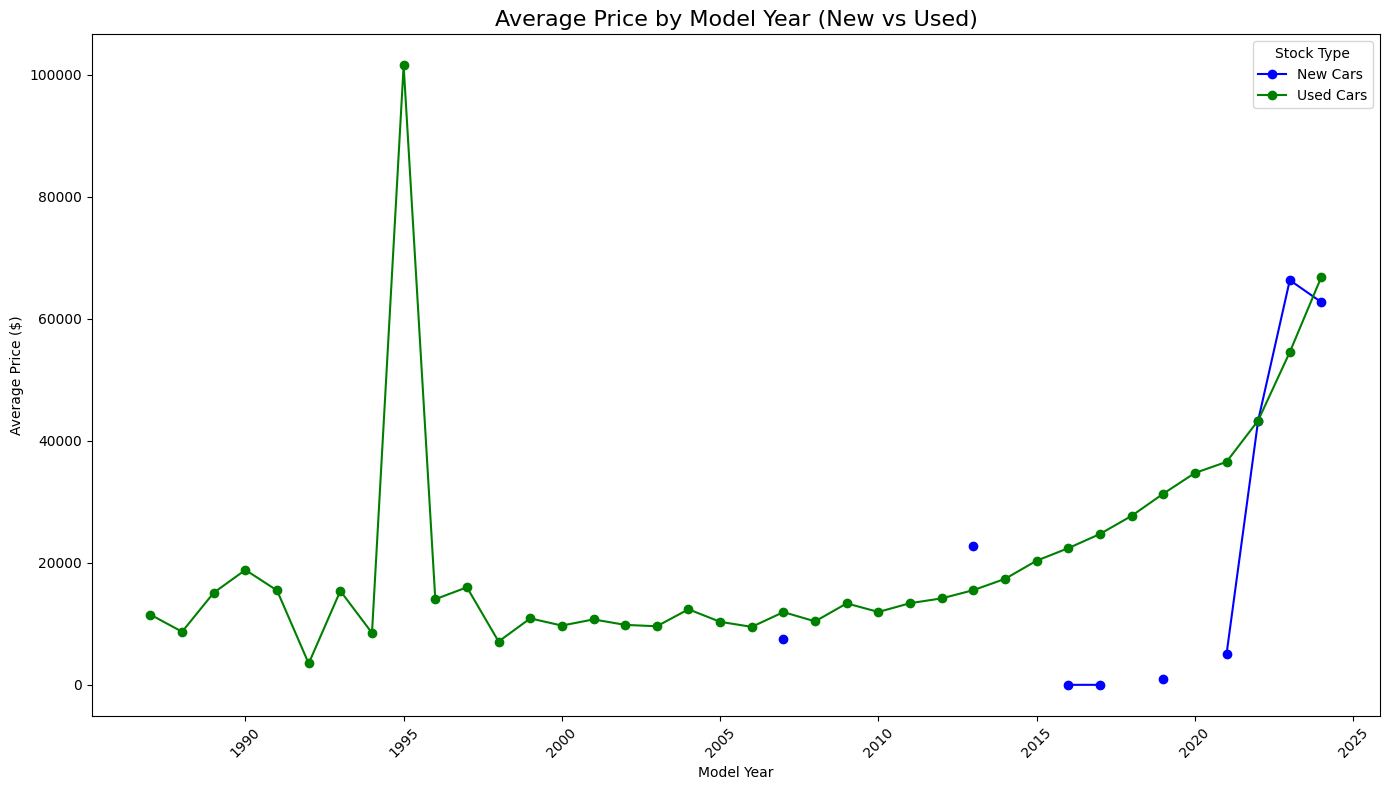

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('CBB_Listings_LongLat (2).csv')  # Ensure the path to your CSV is correct

# Grouping the data by model year and stock type (new or used), then calculating the average price for each group
avg_price_by_year = df.groupby(['model_year', 'stock_type'])['price'].mean().unstack()

# Plotting the line chart for new vs used cars with model year on the X-axis and average price on the Y-axis
plt.figure(figsize=(14, 8))

# Plot lines for new and used cars
plt.plot(avg_price_by_year.index, avg_price_by_year['NEW'], label='New Cars', color='blue', marker='o')
plt.plot(avg_price_by_year.index, avg_price_by_year['USED'], label='Used Cars', color='green', marker='o')

# Adding titles and labels
plt.title('Average Price by Model Year (New vs Used)', fontsize=16)
plt.xlabel('Model Year')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Stock Type')
plt.tight_layout()

# Show the plot
plt.show()


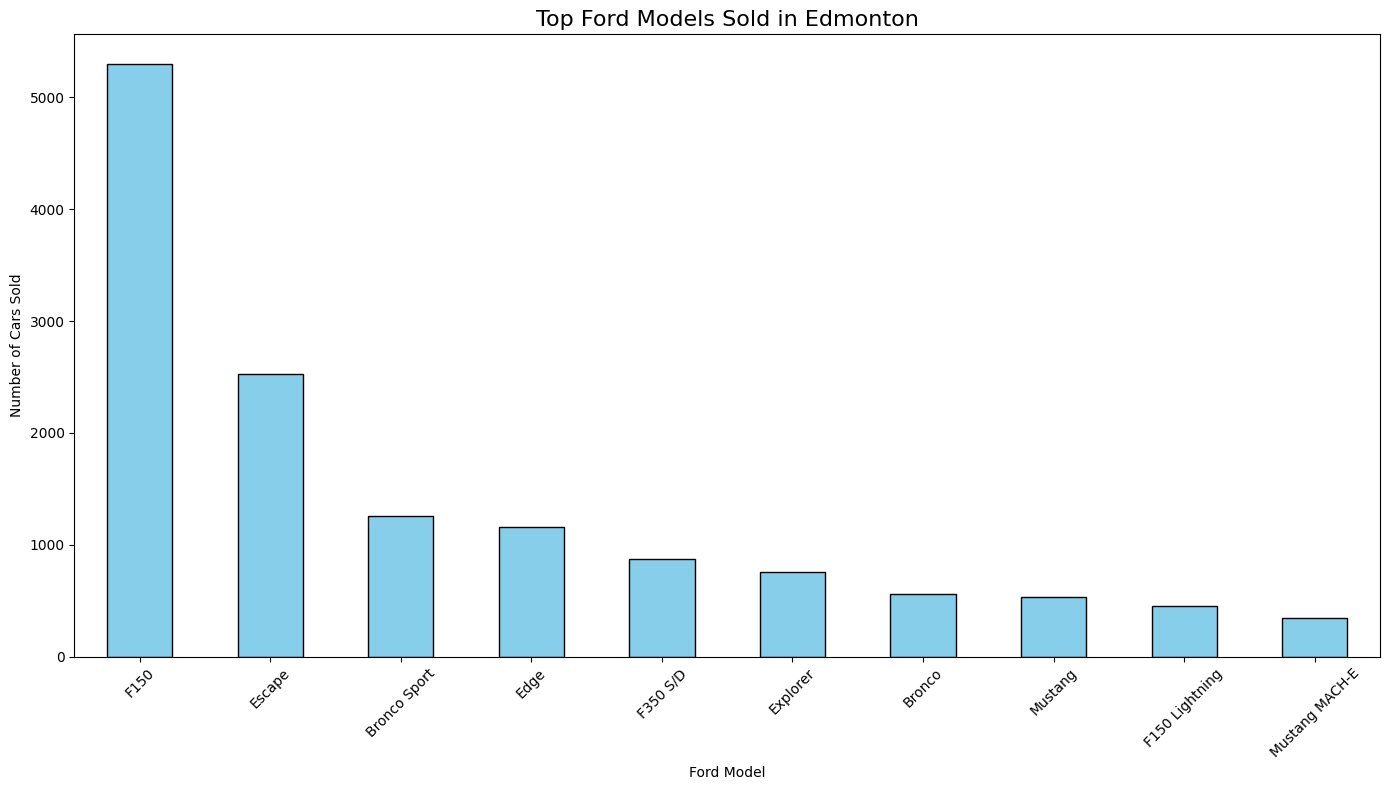

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('CBB_Listings_LongLat (2).csv')  # Ensure the path to your CSV is correct

# Filter the dataset for Ford cars in Edmonton
ford_data = df[(df['make'] == 'Ford') & (df['dealer_city'] == 'Edmonton')]

# Grouping the data by 'model' to get the count of each Ford model sold
ford_models_count = ford_data['model'].value_counts().head(10)  # Get top 10 Ford models

# Plotting the bar chart for Ford models sold in Edmonton
plt.figure(figsize=(14, 8))
ford_models_count.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Top Ford Models Sold in Edmonton', fontsize=16)
plt.xlabel('Ford Model')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


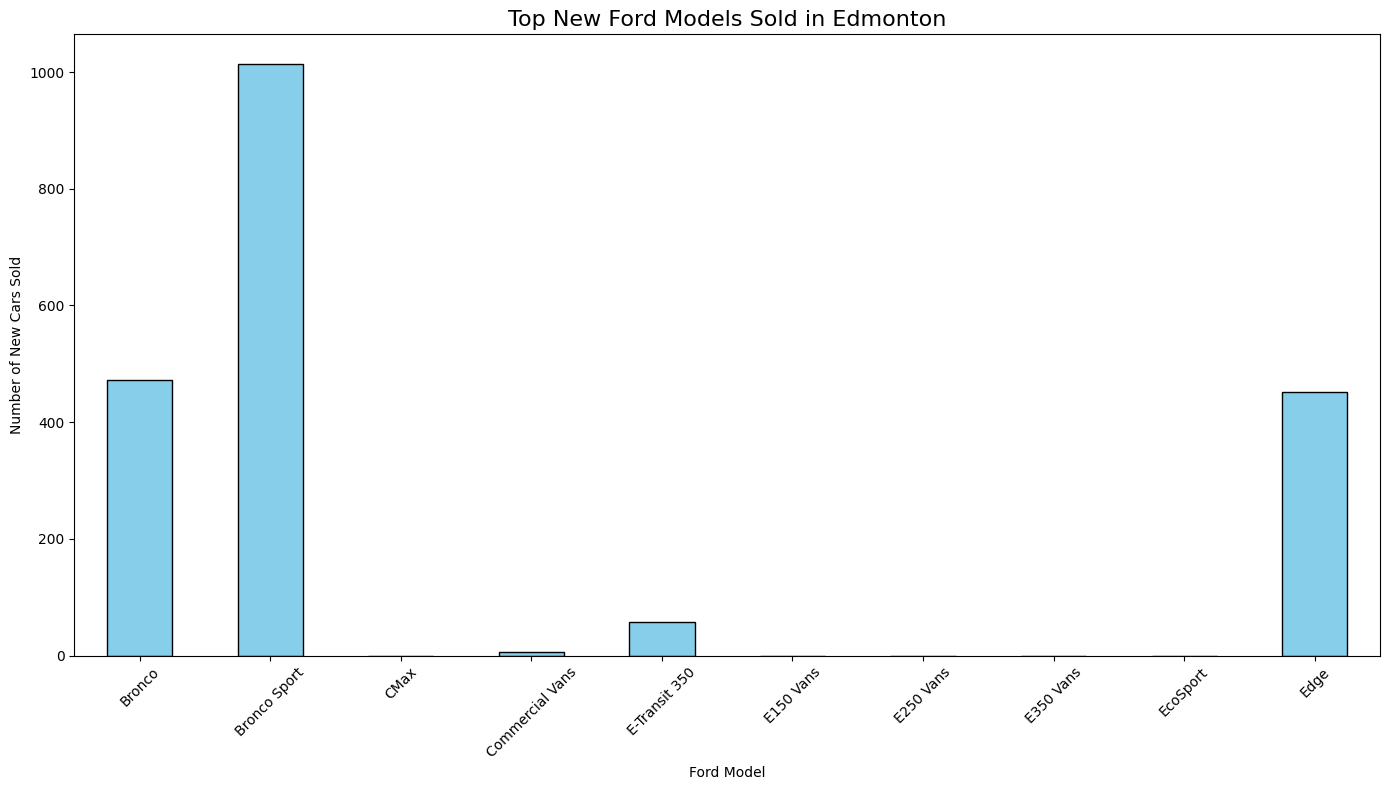

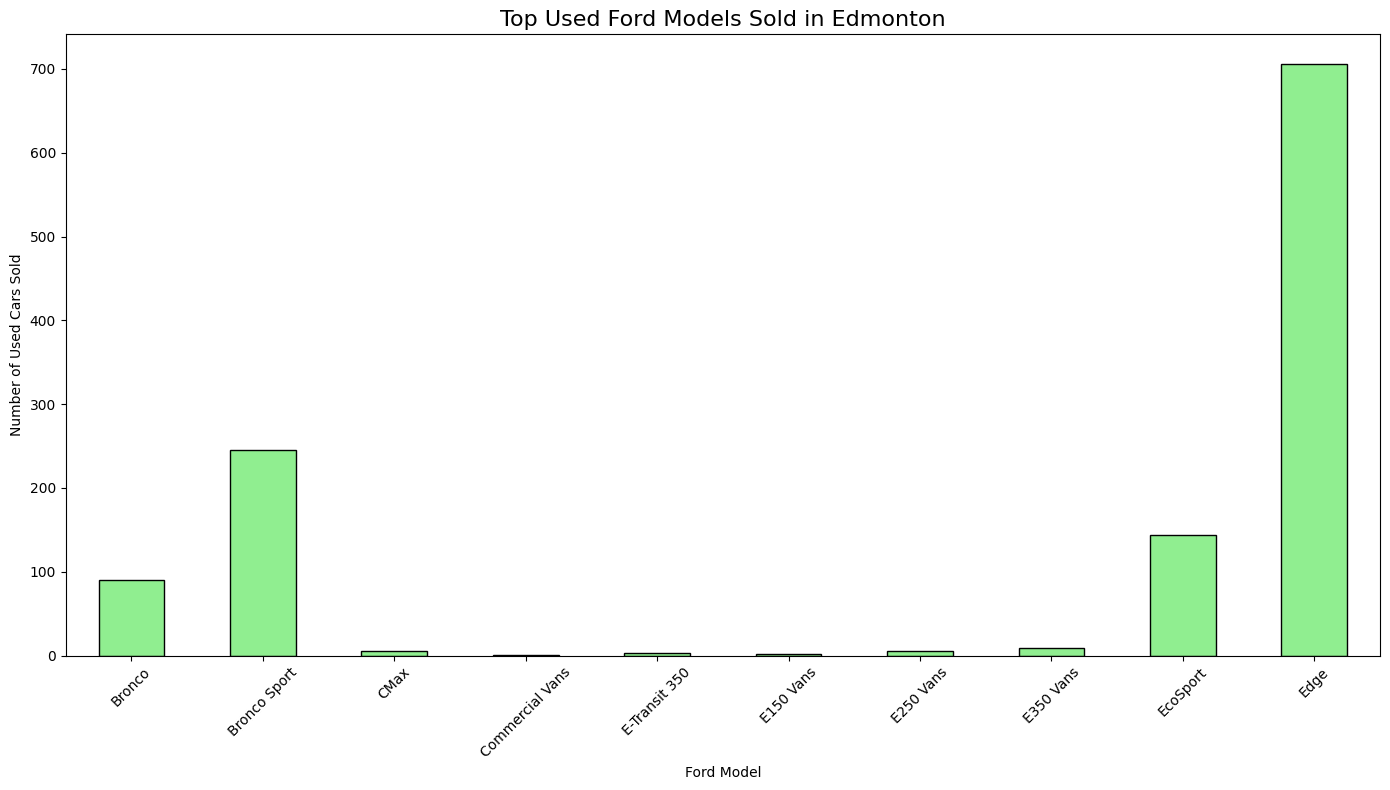

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('CBB_Listings_LongLat (2).csv')  # Ensure the path to your CSV is correct

# Filter the dataset for Ford cars in Edmonton
ford_data = df[(df['make'] == 'Ford') & (df['dealer_city'] == 'Edmonton')]

# Grouping the data by 'model' and 'stock_type' to get the count of new vs used Ford models sold
ford_models_count = ford_data.groupby(['model', 'stock_type']).size().unstack(fill_value=0).head(10)

# Plotting the bar chart for New Ford models sold in Edmonton
plt.figure(figsize=(14, 8))
ford_models_count['NEW'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top New Ford Models Sold in Edmonton', fontsize=16)
plt.xlabel('Ford Model')
plt.ylabel('Number of New Cars Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the bar chart for Used Ford models sold in Edmonton
plt.figure(figsize=(14, 8))
ford_models_count['USED'].plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top Used Ford Models Sold in Edmonton', fontsize=16)
plt.xlabel('Ford Model')
plt.ylabel('Number of Used Cars Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('CBB_Listings_LongLat.csv')  # Ensure the path to your CSV is correct

# Filter the dataset for Ford cars in Edmonton
ford_data = df[(df['make'] == 'Ford') & (df['dealer_city'] == 'Edmonton')]

# Grouping the data by 'model' and 'stock_type' to get the count of new vs used Ford models sold
ford_models_count = ford_data.groupby(['model', 'stock_type']).size().unstack(fill_value=0)

# Get the top 10 Ford models by total count and ensure F150 is included
top_10_ford_models = ford_models_count.sum(axis=1).nlargest(10).index
if 'F150' not in top_10_ford_models:
    top_10_ford_models = top_10_ford_models.tolist()
    top_10_ford_models.append('F150')

# Filter the dataset for the top 10 Ford models and F150
ford_models_top_10 = ford_models_count.loc[top_10_ford_models]

# Plotting the bar chart for New Ford models sold in Edmonton
plt.figure(figsize=(14, 8))
ford_models_top_10['NEW'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 New Ford Models Sold in Edmonton (Including F150)', fontsize=16)
plt.xlabel('Ford Model')
plt.ylabel('Number of New Cars Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the bar chart for Used Ford models sold in Edmonton
plt.figure(figsize=(14, 8))
ford_models_top_10['USED'].plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 10 Used Ford Models Sold in Edmonton (Including F150)', fontsize=16)
plt.xlabel('Ford Model')
plt.ylabel('Number of Used Cars Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'CBB_Listings_LongLat.csv'

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/CBB_Listings_LongLat.csv'
df = pd.read_csv(file_path)

# Filter for sold listings
sold_listings = df[df['listing_type'] == 'Sold']

# Handle missing or empty data for the listing_heading
sold_listings['listing_heading'] = sold_listings['listing_heading'].fillna('Unknown Car')

# Extract the sale price from price history (assuming the last price in the history is the sale price)
sold_listings['sale_price'] = sold_listings['price_history_delimited'].apply(lambda x: float(x.split(',')[1]) if isinstance(x, str) else 0)

# Group by dealer to get the number of cars sold, total sales value, and most popular car
dealer_summary = sold_listings.groupby('dealer_name').agg(
    cars_sold=('listing_id', 'count'),
    total_sales_value=('sale_price', 'sum'),
    most_popular_car=('listing_heading', lambda x: x.mode()[0] if len(x) > 0 else 'Unknown Car')
).reset_index()

# Sort by number of cars sold and take the top 10
dealer_summary_sorted = dealer_summary.sort_values(by='cars_sold', ascending=False).head(10)

# Create a DataFrame for the top 10 dealerships
top_10_df = pd.DataFrame(dealer_summary_sorted)

# Display the DataFrame
top_10_df


testtttttttttttttttttttttt
